## Data Visualization with ggplot2

The ability to produce meaningful and beautiful data visualizations is an essential part of skill set as a data scientist. 

- `ggplot2` is the go-to tool for flexible and professional plots in R. 
- examine the three essential layers for making a plot - Data, Aesthetics and Geometries. 
- Calculate statistics and see how Coordinates and Facets aid in communication. 
- Make a custom plotting function to explore a large data set, combining statistics and excellent visuals.

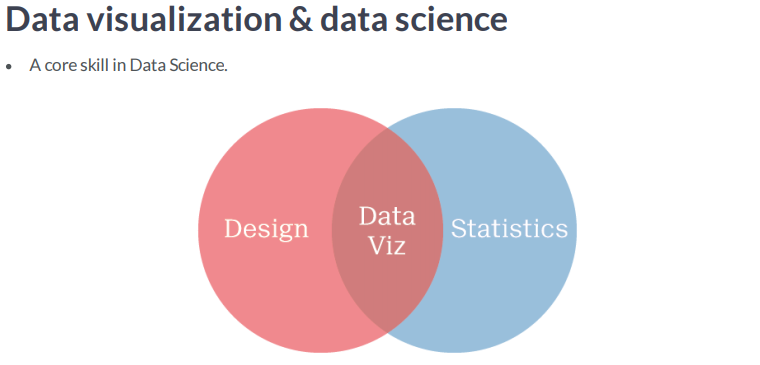

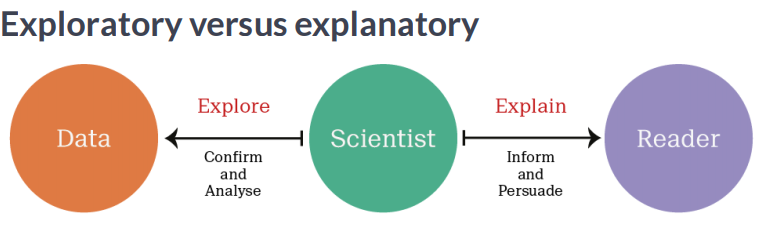

### 1. Introduction


In [46]:
# Load the ggplot2 package
library(ggplot2)
library(repr)
options(repr.plot.width=15, repr.plot.height=6)
library(car)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


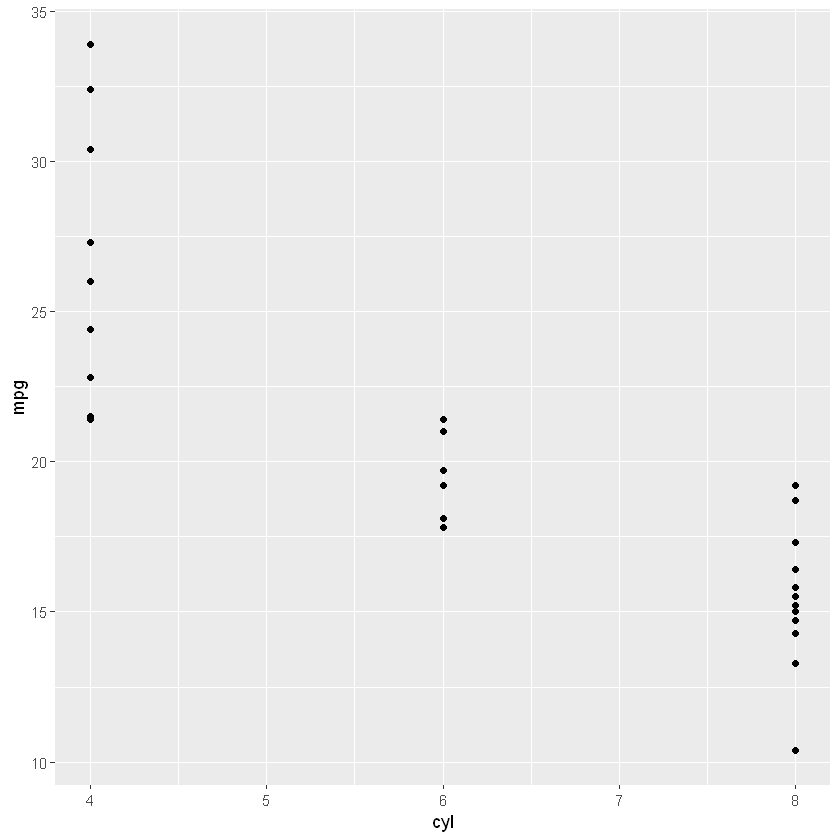

In [2]:
# Explore the mtcars data frame with str()
str(mtcars)

# Execute the following command
ggplot(mtcars, aes(cyl, mpg)) +
  geom_point()

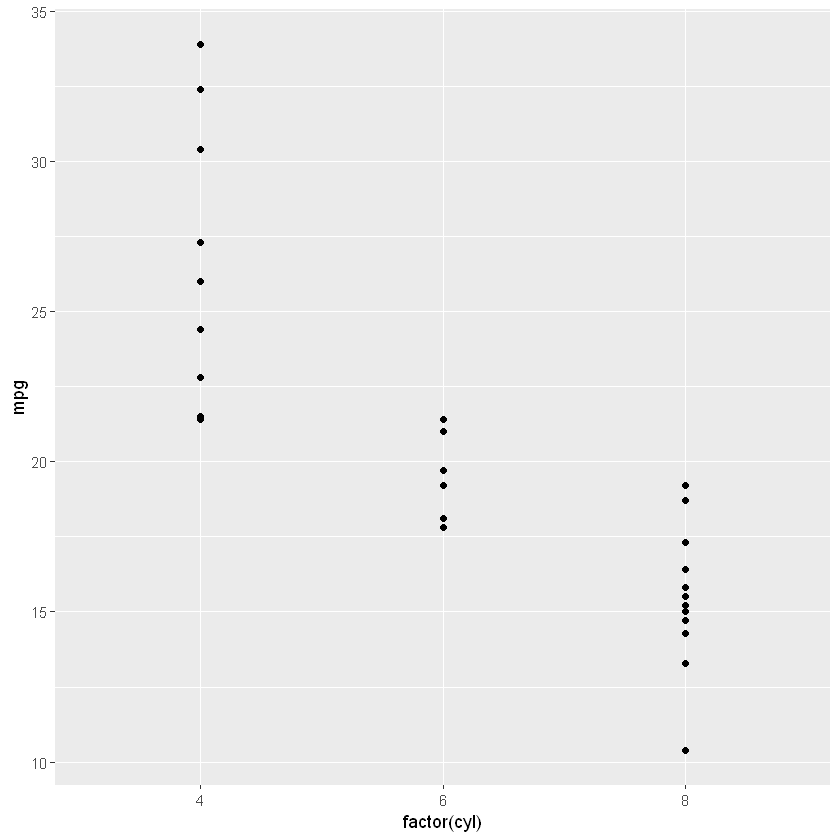

In [3]:
# Change the command below so that cyl is treated as factor
ggplot(mtcars, aes(factor(cyl), mpg)) + 
  geom_point()

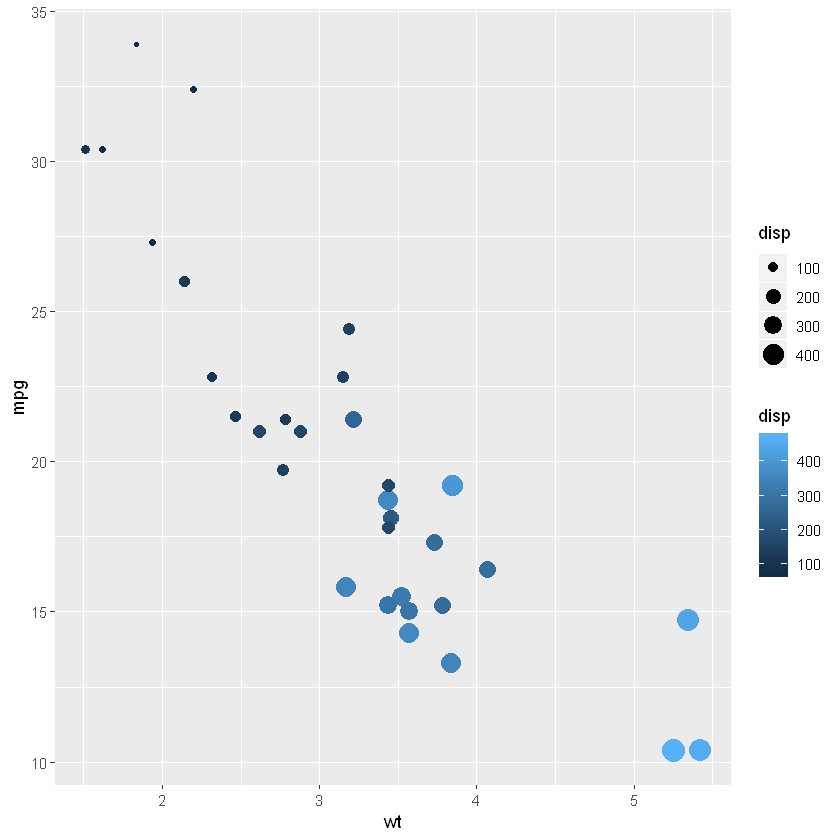

In [4]:
# Change the color aesthetic to a size aesthetic
ggplot(mtcars, aes(wt, mpg, color = disp, size=disp)) +
  geom_point()

In [5]:
str(diamonds)

Classes 'tbl_df', 'tbl' and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


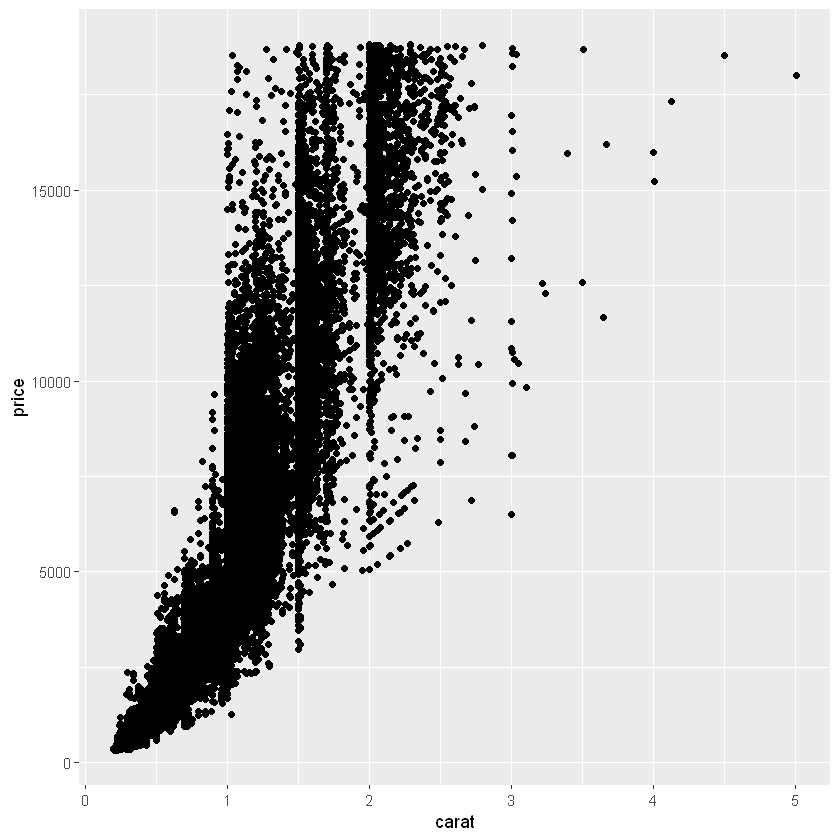

In [6]:
# Add geom_smooth() with +
ggplot(diamonds, aes(carat, price)) +
  geom_point()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



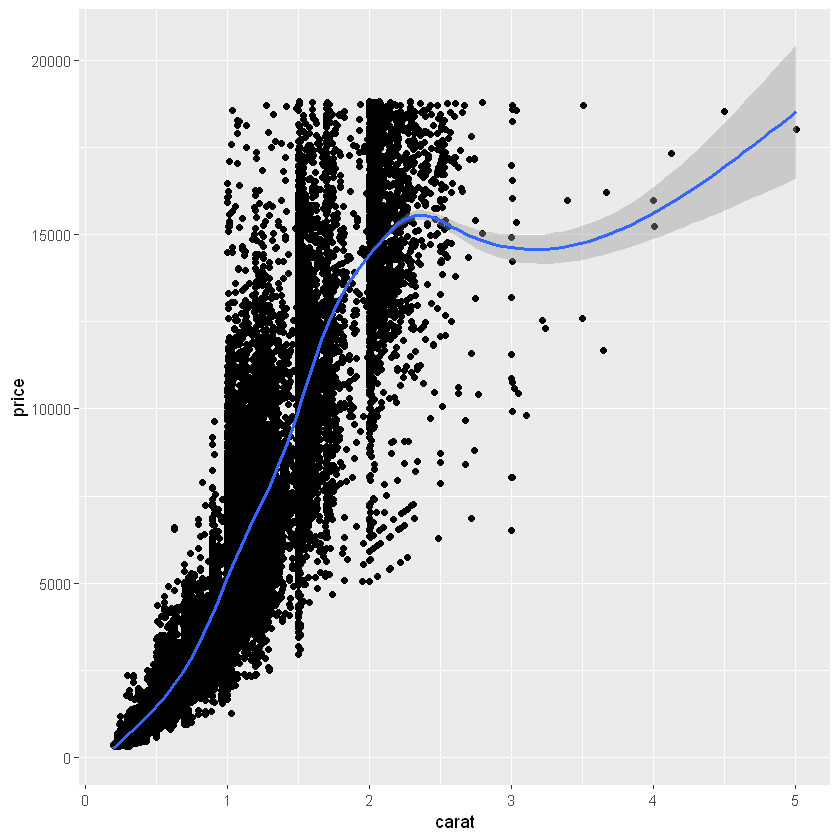

In [8]:
# Add geom_smooth() with +
ggplot(diamonds, aes(carat, price)) +
  geom_point() + geom_smooth()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



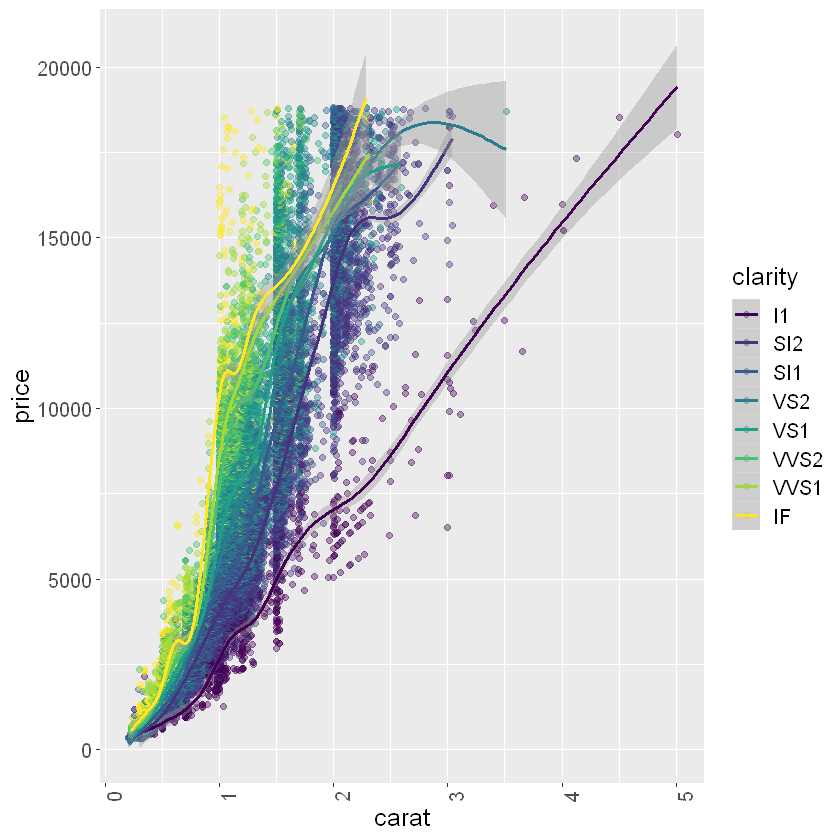

In [13]:

# Make the points 40% opaque
ggplot(diamonds, aes(carat, price, color = clarity)) +
  geom_point(alpha=0.4) +
  geom_smooth()+
theme(text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))

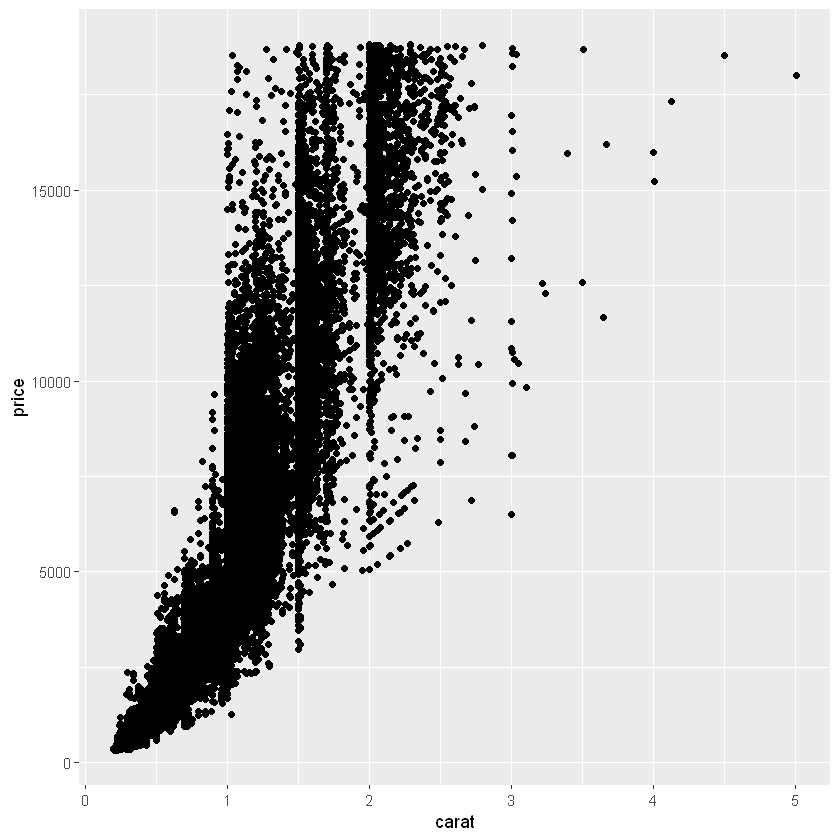

In [14]:
# Draw a ggplot
plt_price_vs_carat <- ggplot(
  # Use the diamonds dataset
  diamonds,
  # For the aesthetics, map x to carat and y to price
  aes(carat, price)
)

# Add a point layer to plt_price_vs_carat
 plt_price_vs_carat+ geom_point()

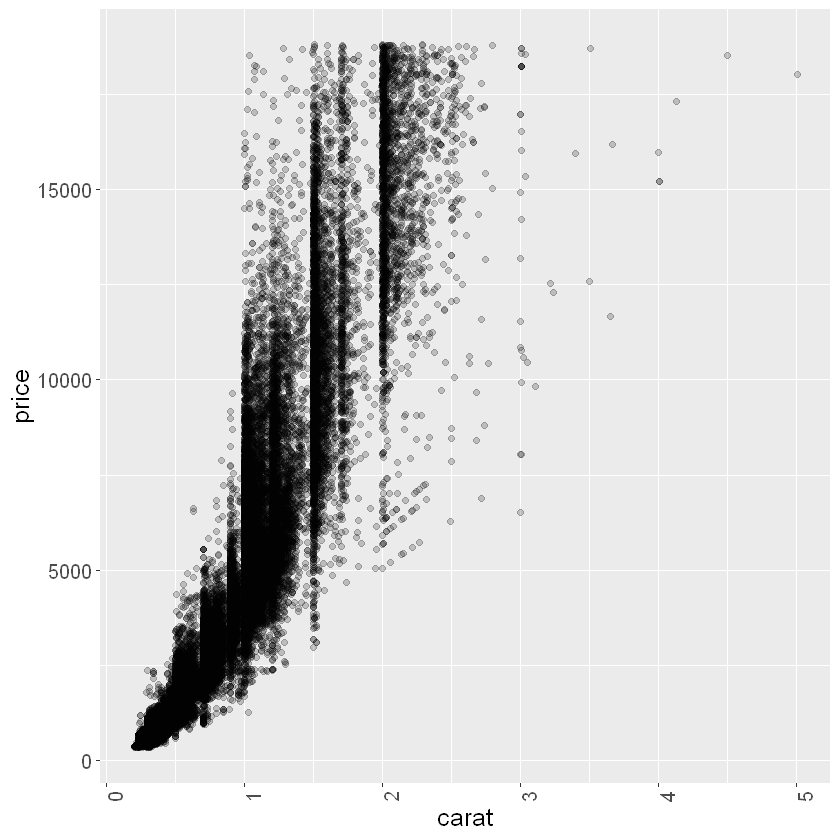

In [19]:
# From previous step
plt_price_vs_carat <- ggplot(diamonds, aes(carat, price))

# Edit this to make points 20% opaque: plt_price_vs_carat_transparent
plt_price_vs_carat_transparent <- plt_price_vs_carat + geom_point(alpha=0.2)+theme(text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))

# See the plot
plt_price_vs_carat_transparent

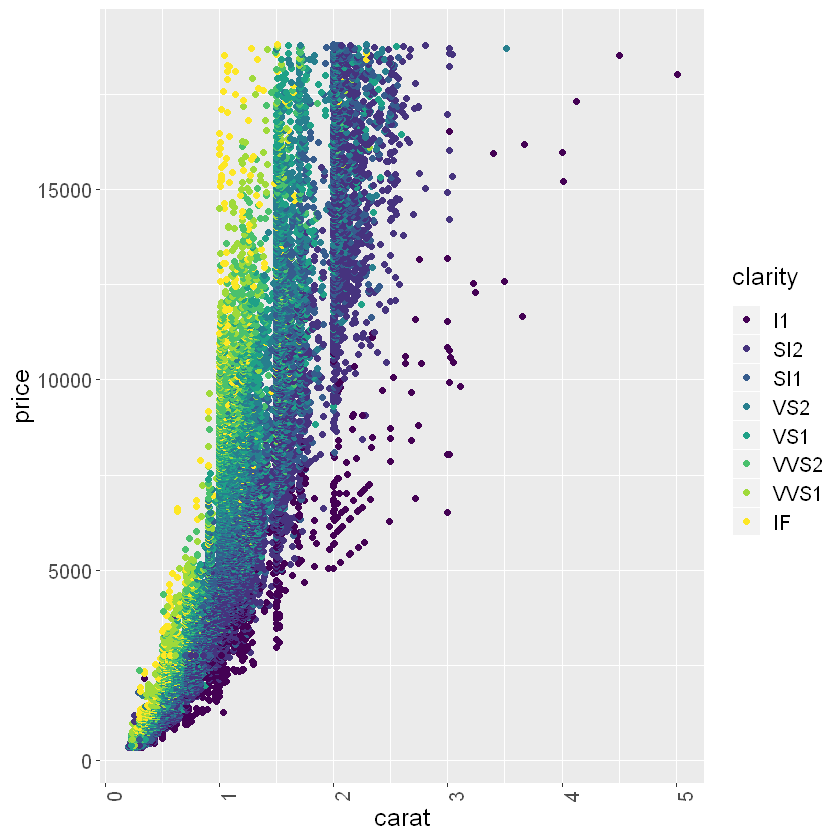

In [20]:
# From previous step
plt_price_vs_carat <- ggplot(diamonds, aes(carat, price))

# Edit this to map color to clarity,
# Assign the updated plot to a new object
plt_price_vs_carat_by_clarity <- plt_price_vs_carat + geom_point(aes(color=clarity)) + theme(text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))

# See the plot
plt_price_vs_carat_by_clarity

### 2. Aesthetics
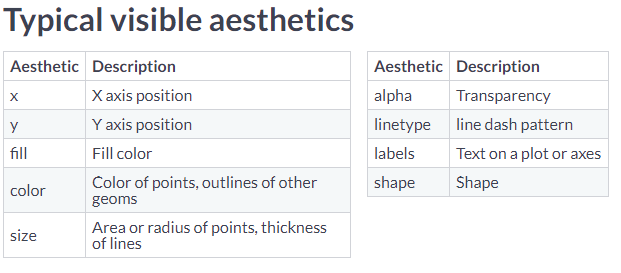

In [22]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


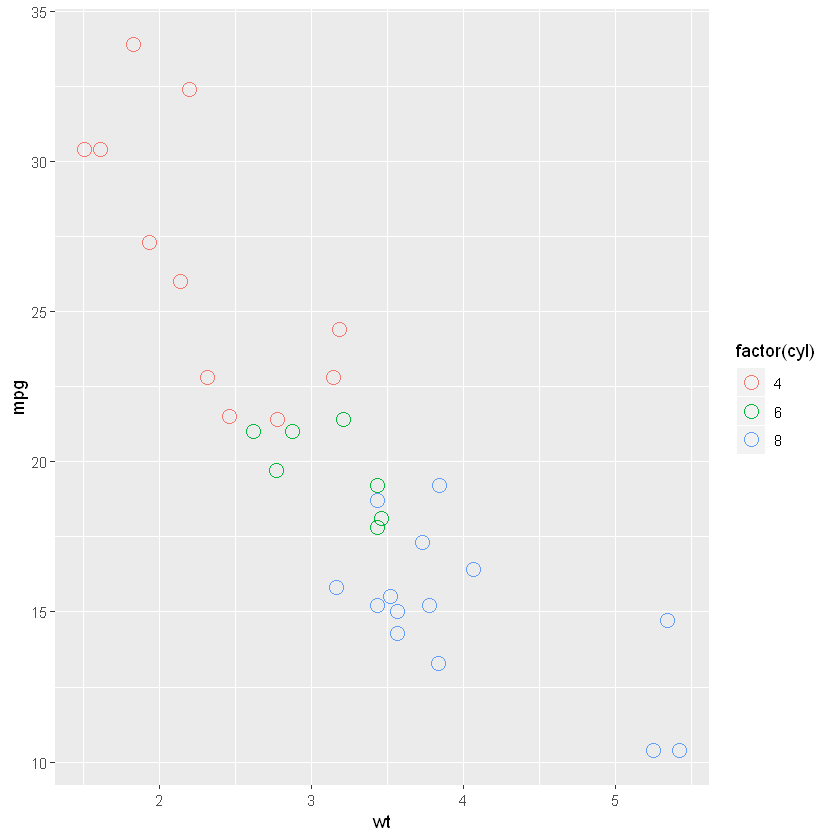

In [32]:
ggplot(mtcars, aes(wt, mpg, color = factor(cyl))) +
  # Set the shape and size of the points
  geom_point(shape=1, size=4)

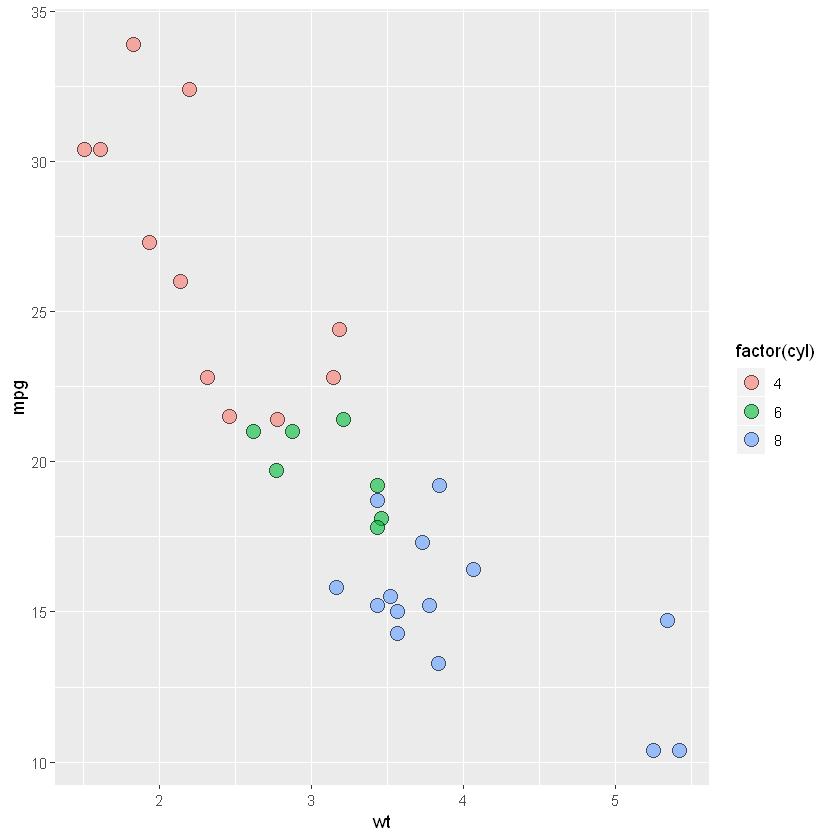

In [37]:
ggplot(mtcars, aes(wt, mpg, fill = factor(cyl))) +
  # Change point shape; set alpha
  geom_point(shape = 21, alpha=0.6, size = 4)

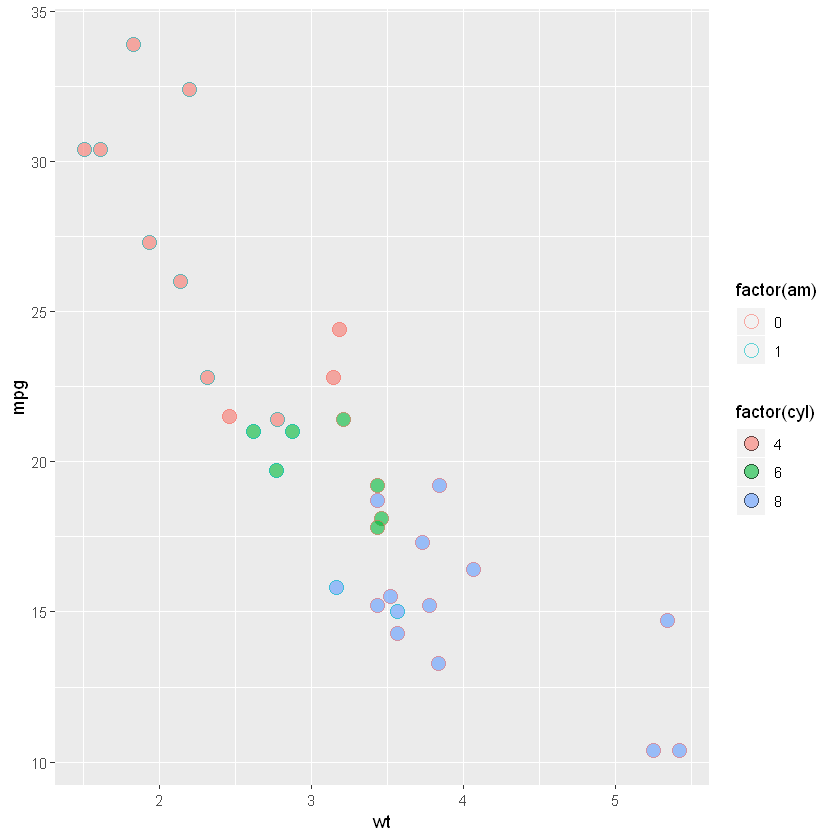

In [40]:
ggplot(mtcars, aes(wt, mpg, fill = factor(cyl), color =factor(am))) +
  geom_point(shape = 21, size = 4, alpha = 0.6)

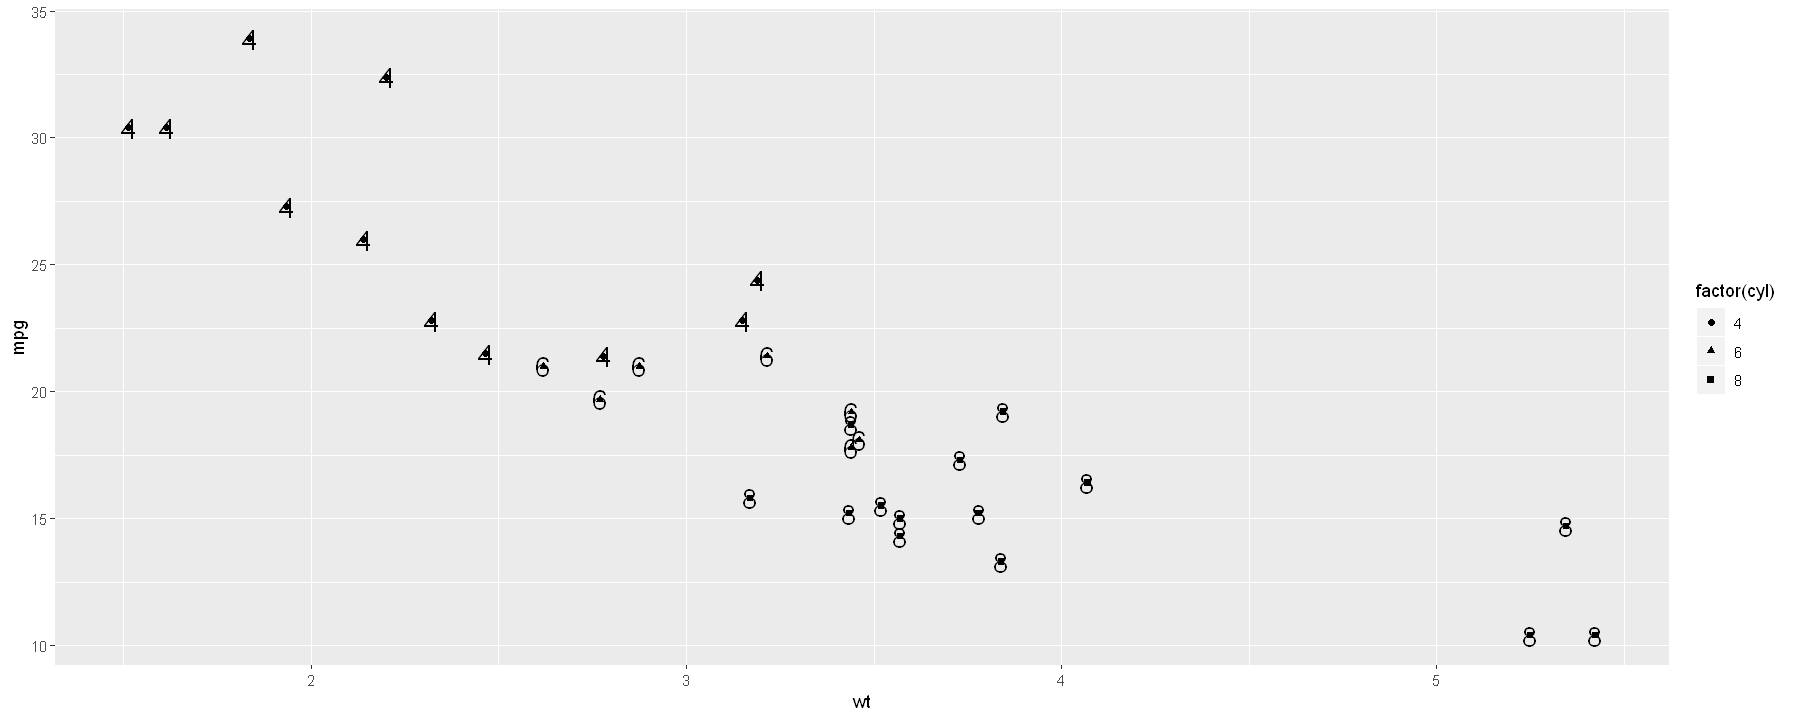

In [51]:
# Base layer
plt_mpg_vs_wt <- ggplot(mtcars, aes(wt, mpg))

# Use text layer and map fcyl to label
plt_mpg_vs_wt +
  geom_point(aes(shape = factor(cyl)))+ geom_text(aes(label=factor(cyl)), size=6)

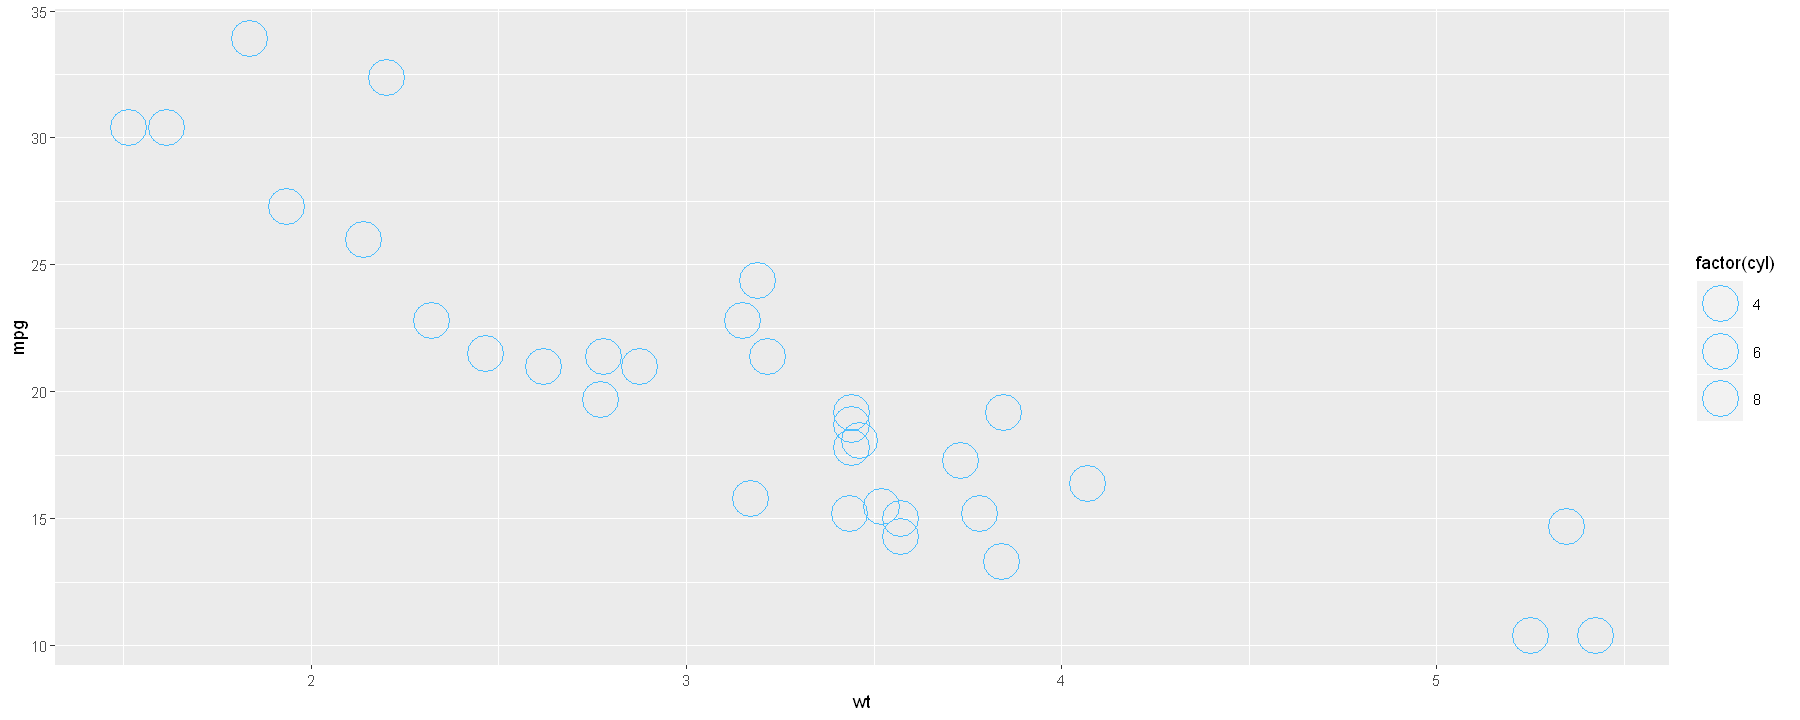

In [59]:
# A hexadecimal color
my_blue <- "#4ABEFF"

# Change the color mapping to a fill mapping
ggplot(mtcars, aes(wt, mpg, fill = factor(cyl))) +
  # Set point size and shape
  geom_point(color=my_blue, shape=1, size=10)

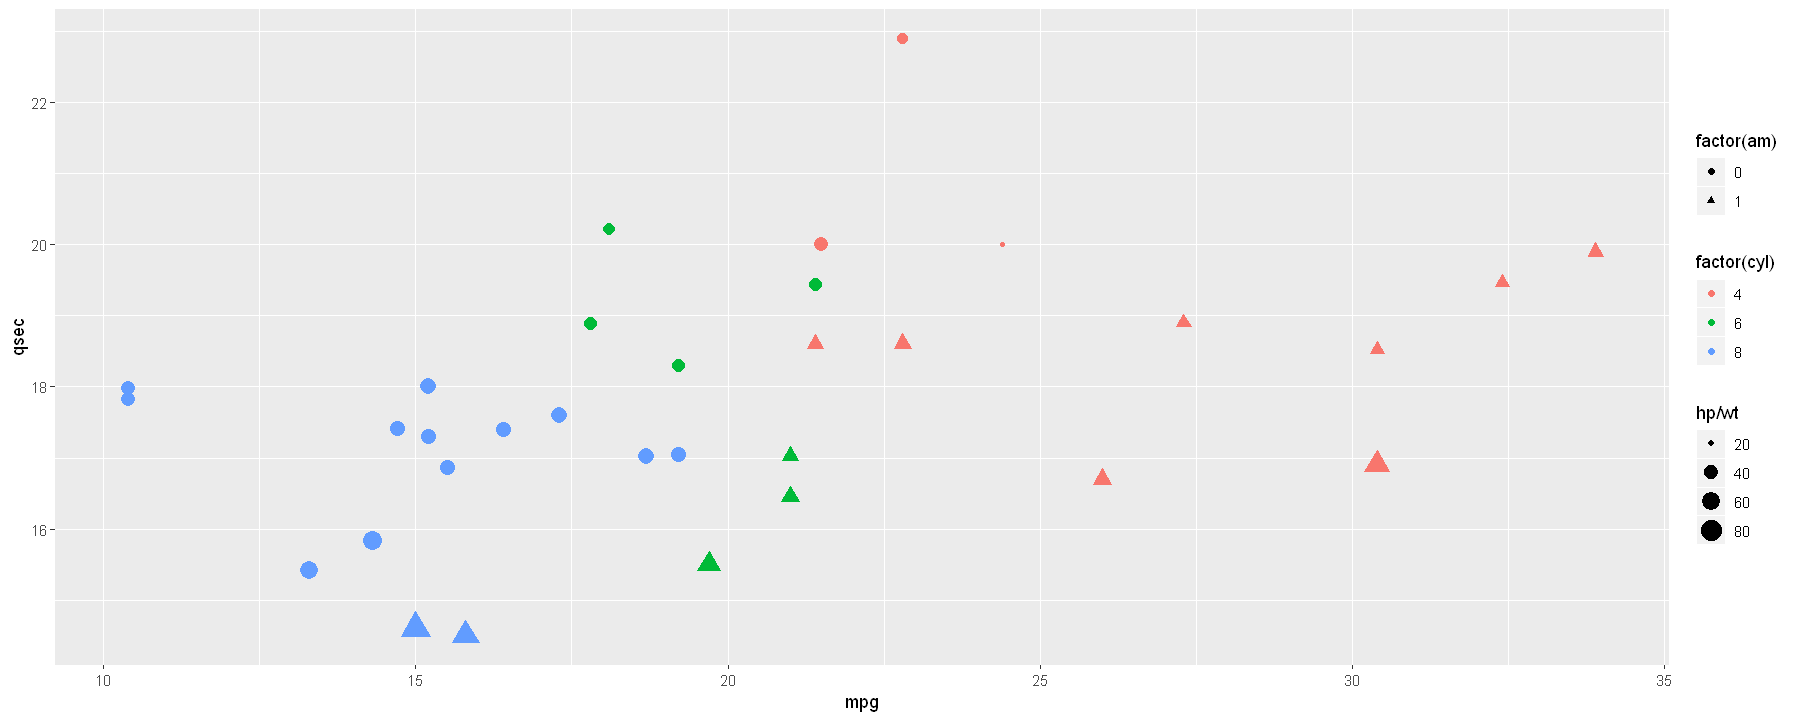

In [57]:
ggplot(mtcars, aes(mpg, qsec, color = factor(cyl), shape = factor(am), size=hp/wt)) +
  geom_point()

without position


<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: fill
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: Transmission
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    reset: function
    scale_name: manual
    train: function
    train_df: function
    

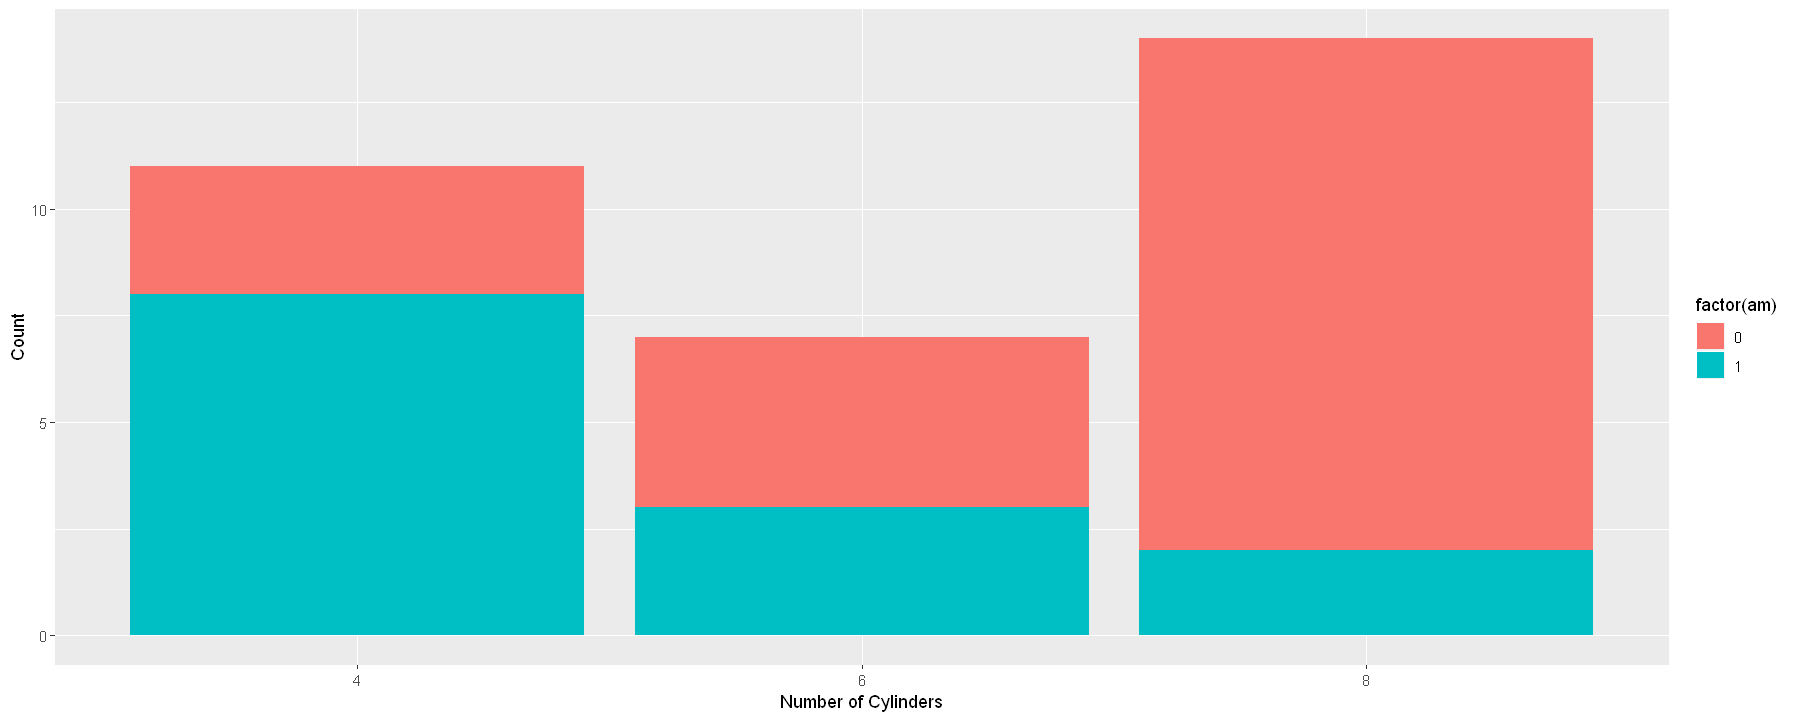

In [66]:
palette <- c(automatic = "#377EB8", manual = "#E41A1C")

# Set the position
a <-ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  geom_bar() +
  labs(x = "Number of Cylinders", y = "Count")
  scale_fill_manual("Transmission", values = palette);

a;

<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: fill
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: Transmission
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    reset: function
    scale_name: manual
    train: function
    train_df: function
    

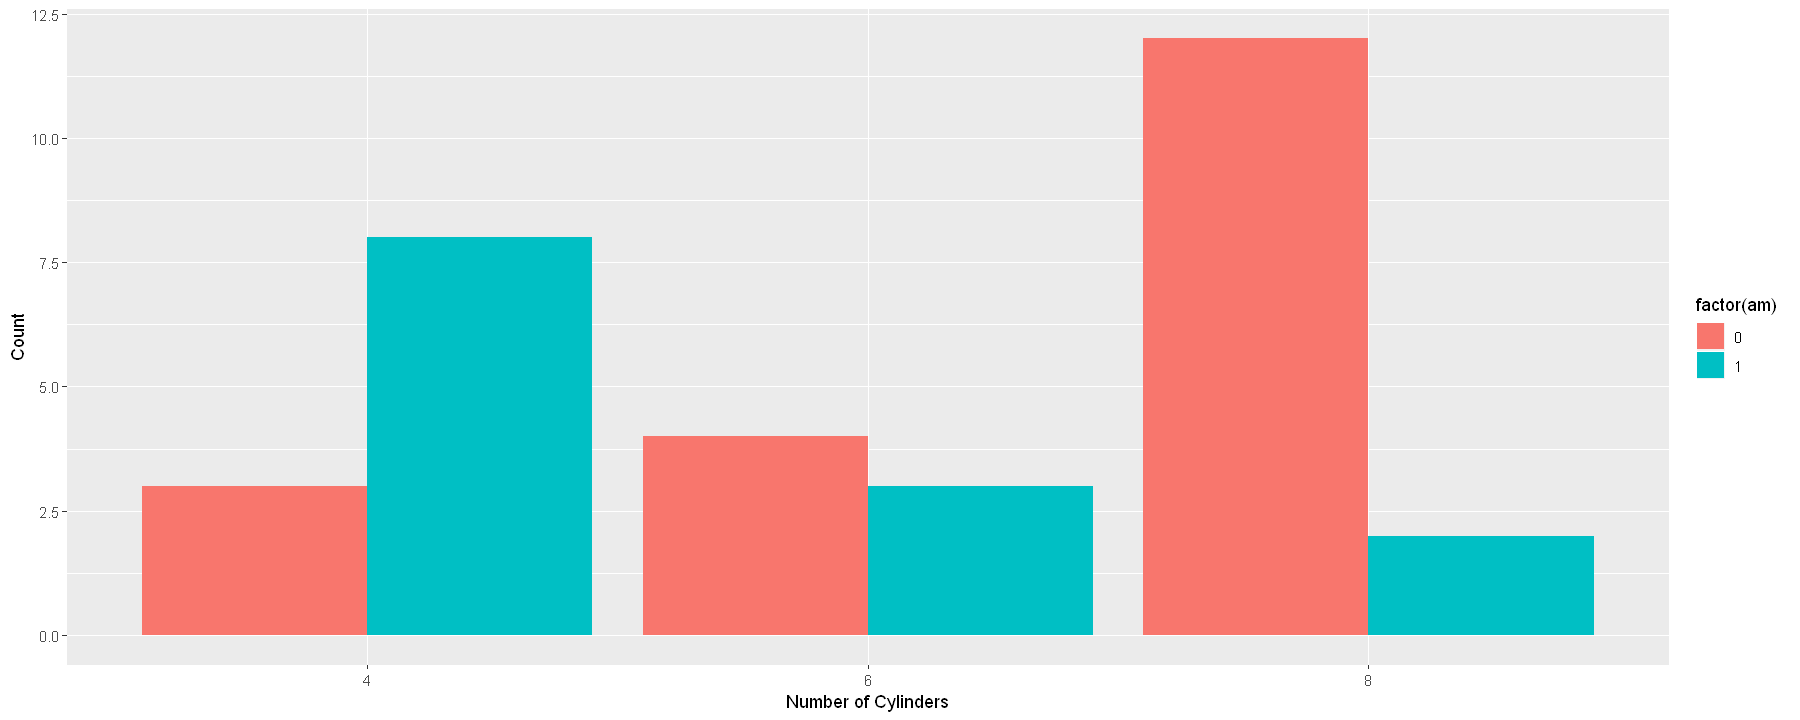

In [65]:
palette <- c(automatic = "#377EB8", manual = "#E41A1C")

# Set the position
ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  geom_bar(position='dodge') +
  labs(x = "Number of Cylinders", y = "Count")
  scale_fill_manual("Transmission", values = palette)

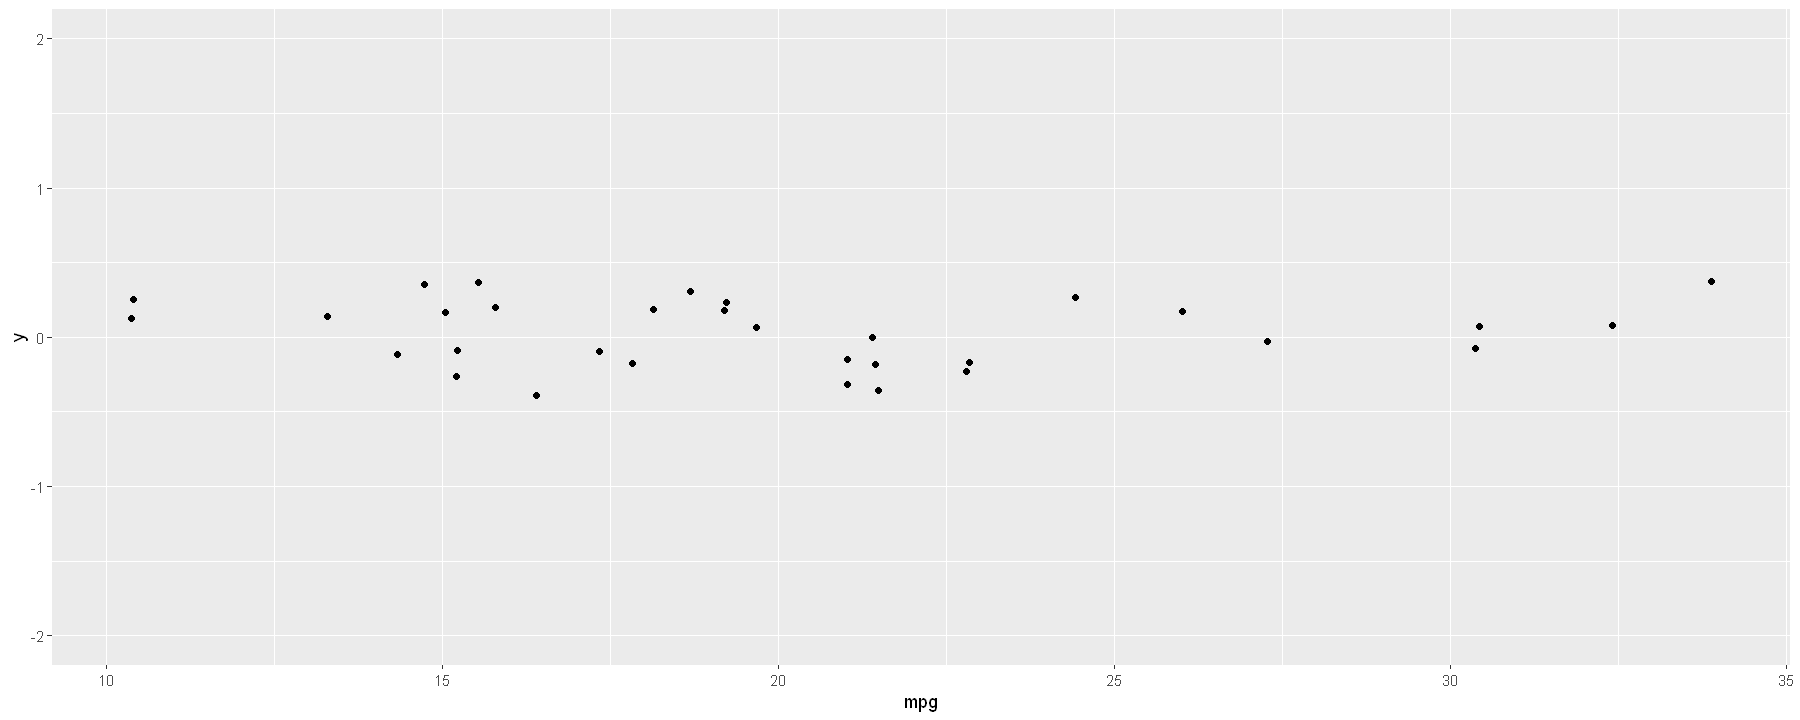

In [67]:
ggplot(mtcars, aes(mpg, 0)) +
  geom_jitter() +
  # Set the y-axis limits
  ylim(-2,2)

### 3. Geometries


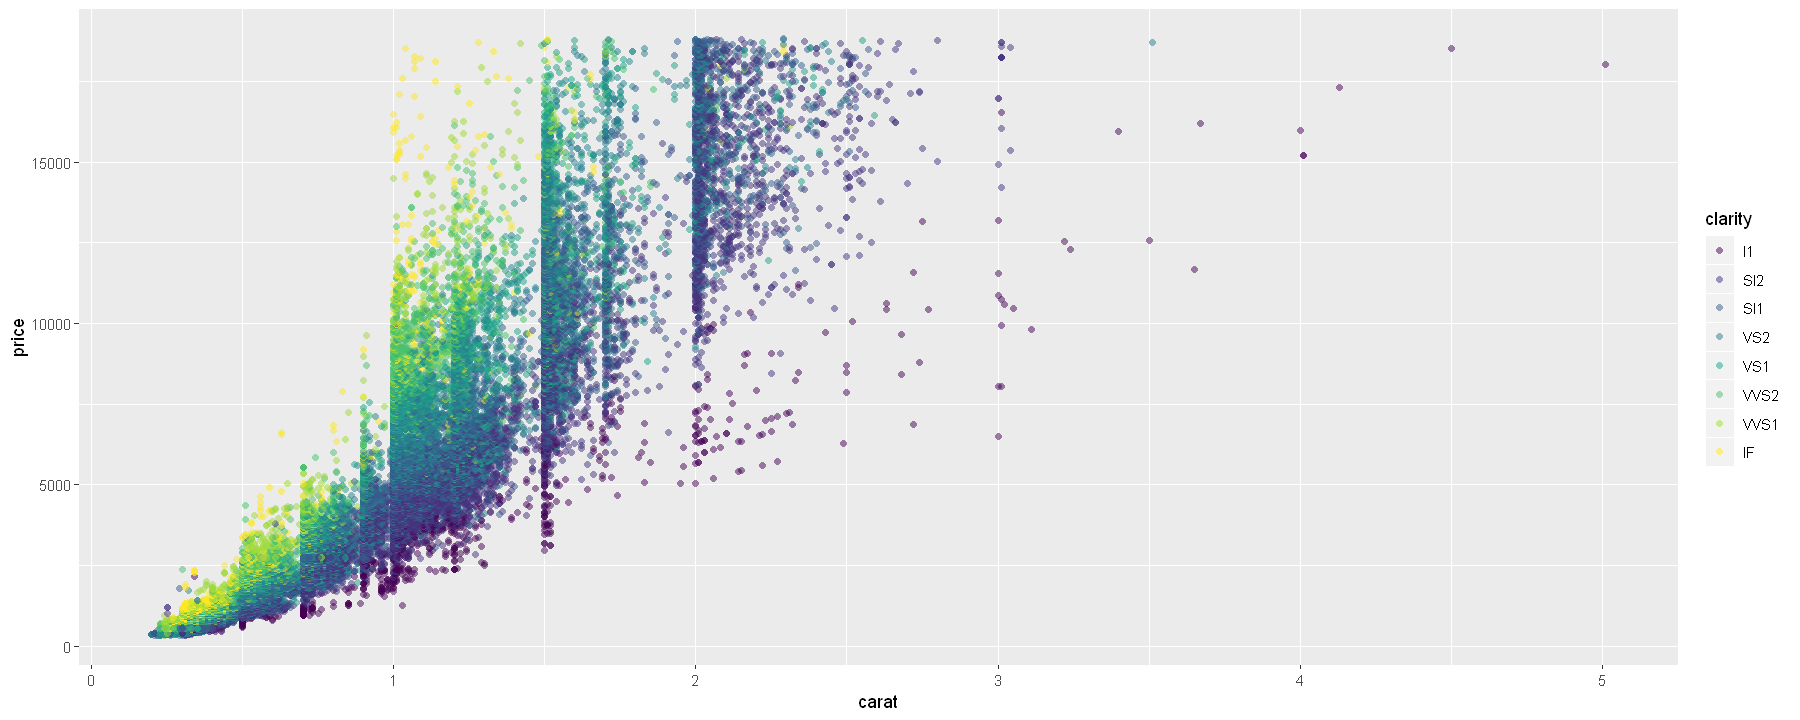

In [74]:
# Plot price vs. carat, colored by clarity
plt_price_vs_carat_by_clarity <- ggplot(diamonds, aes(carat, price, color = clarity))

# Set transparency to 0.5
plt_price_vs_carat_by_clarity + geom_point(alpha = 0.5, shape = 16)  

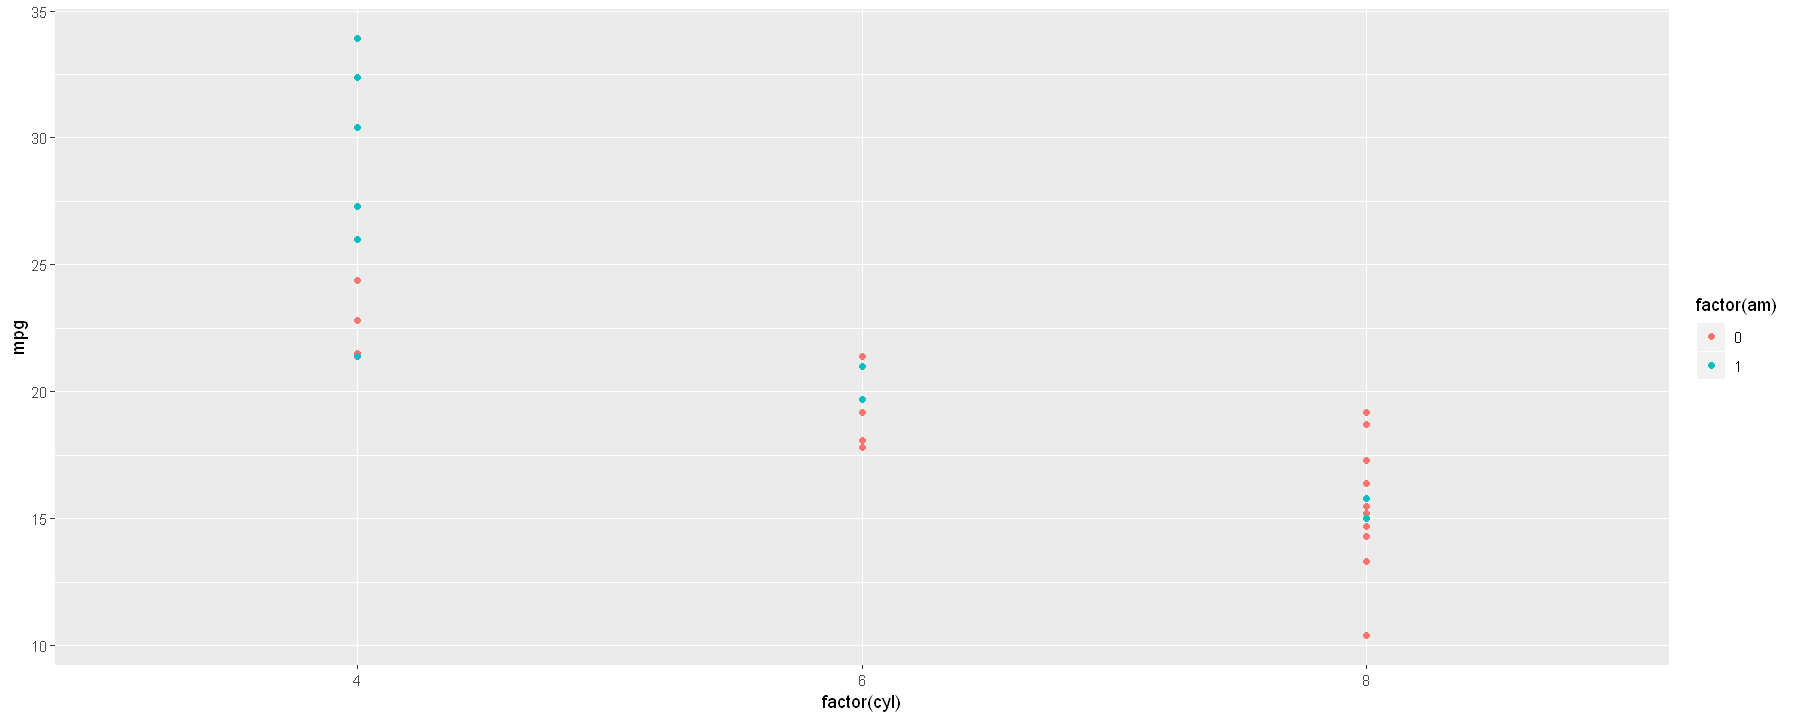

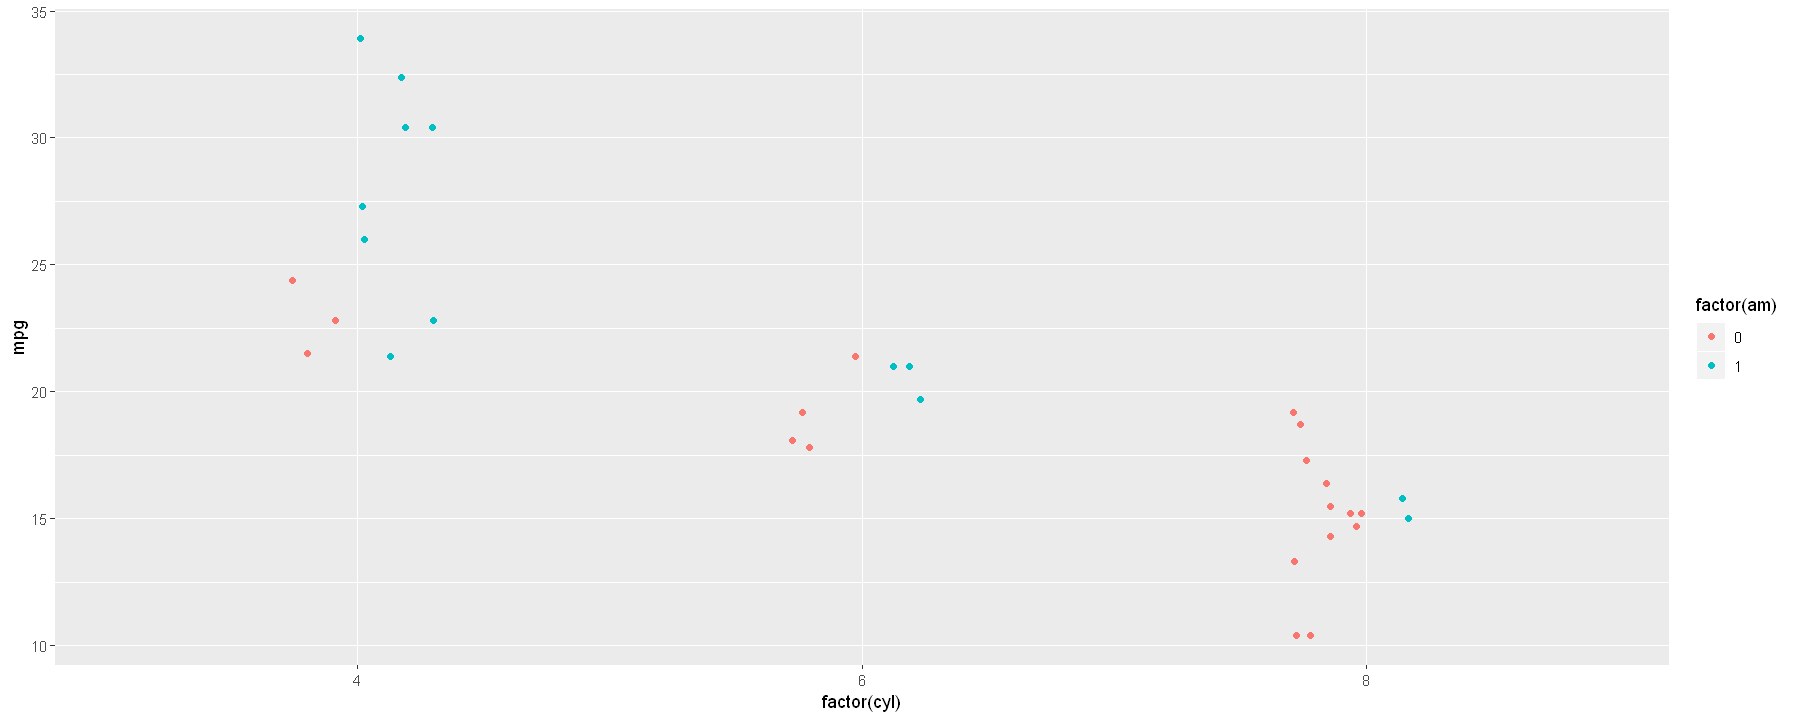

In [77]:
# Plot base
plt_mpg_vs_fcyl_by_fam <- ggplot(mtcars, aes(factor(cyl), mpg, color = factor(am)))

# Default points are shown for comparison
plt_mpg_vs_fcyl_by_fam + geom_point()

# Now jitter and dodge the point positions
plt_mpg_vs_fcyl_by_fam + geom_point(position = position_jitterdodge(dodge.width=0.3,jitter.width= 0.3))

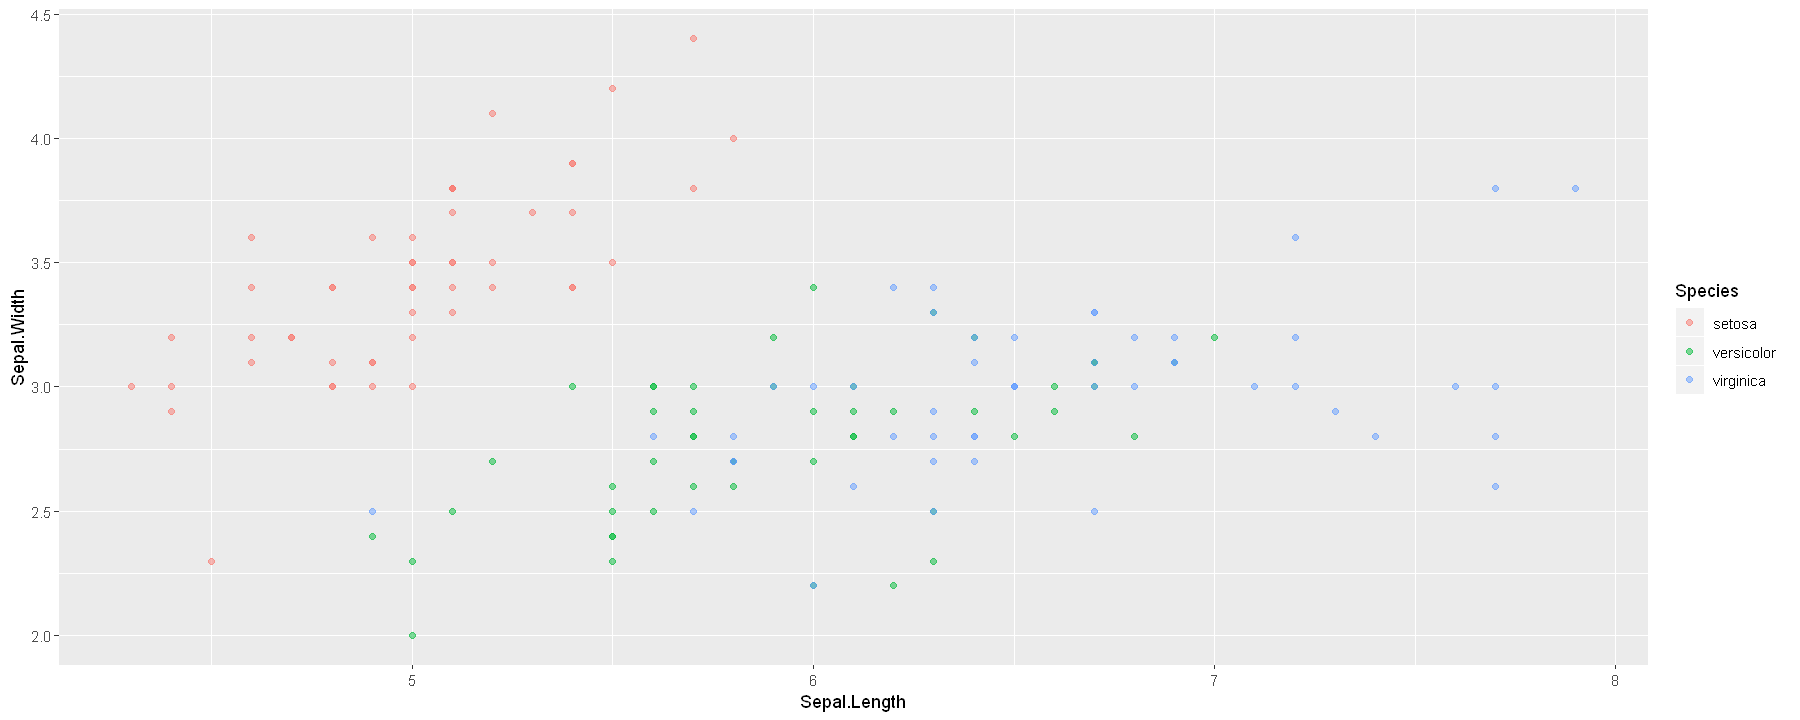

In [78]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species)) +
  # Swap for jitter layer with width 0.1
  geom_point(alpha = 0.5)

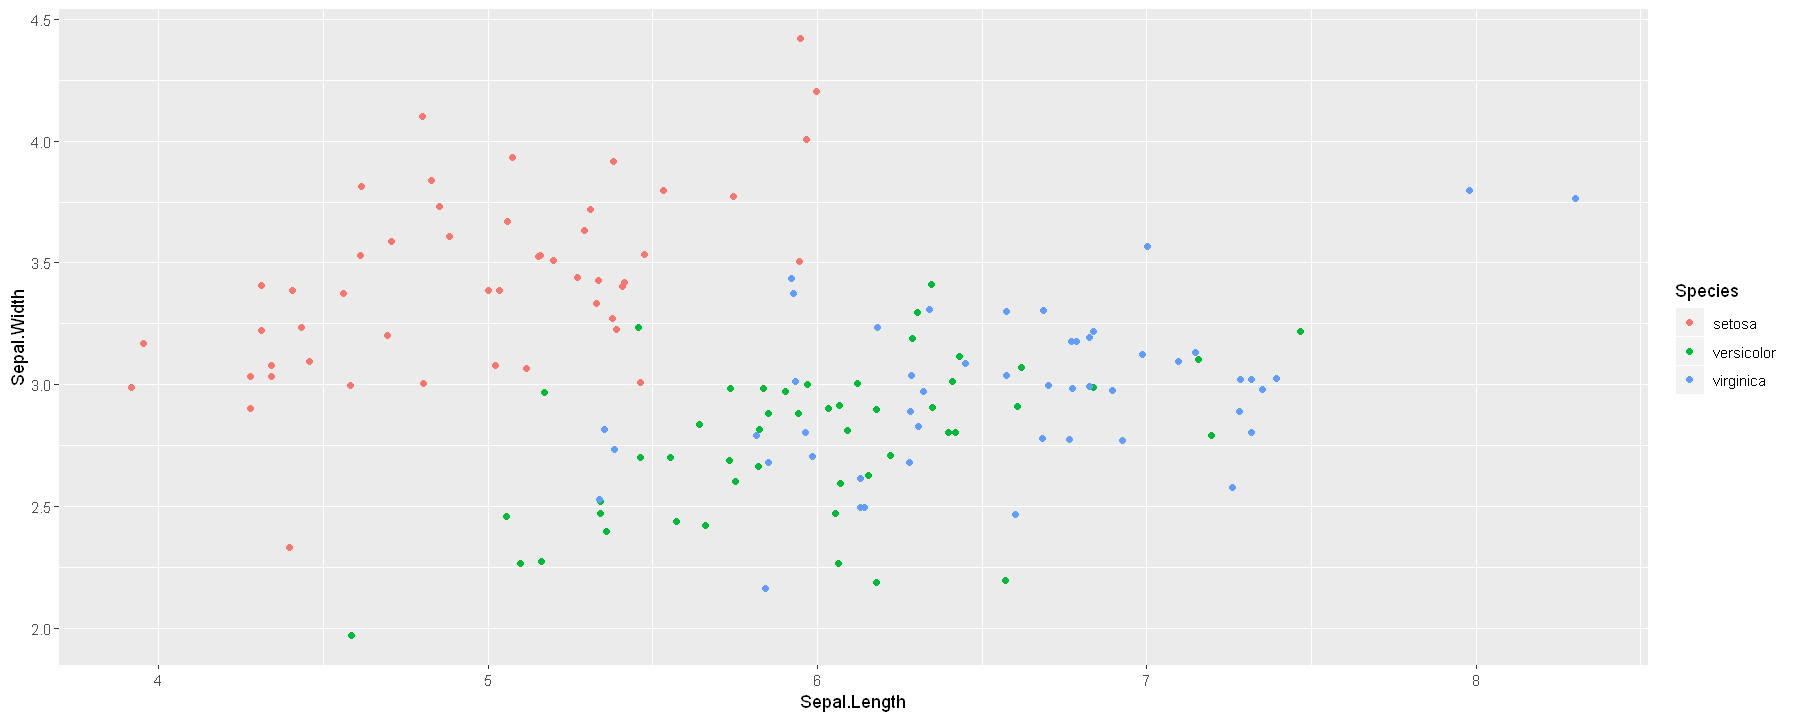

In [82]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species)) +
  # Swap for jitter layer with width 0.5
  geom_jitter(width=0.5)

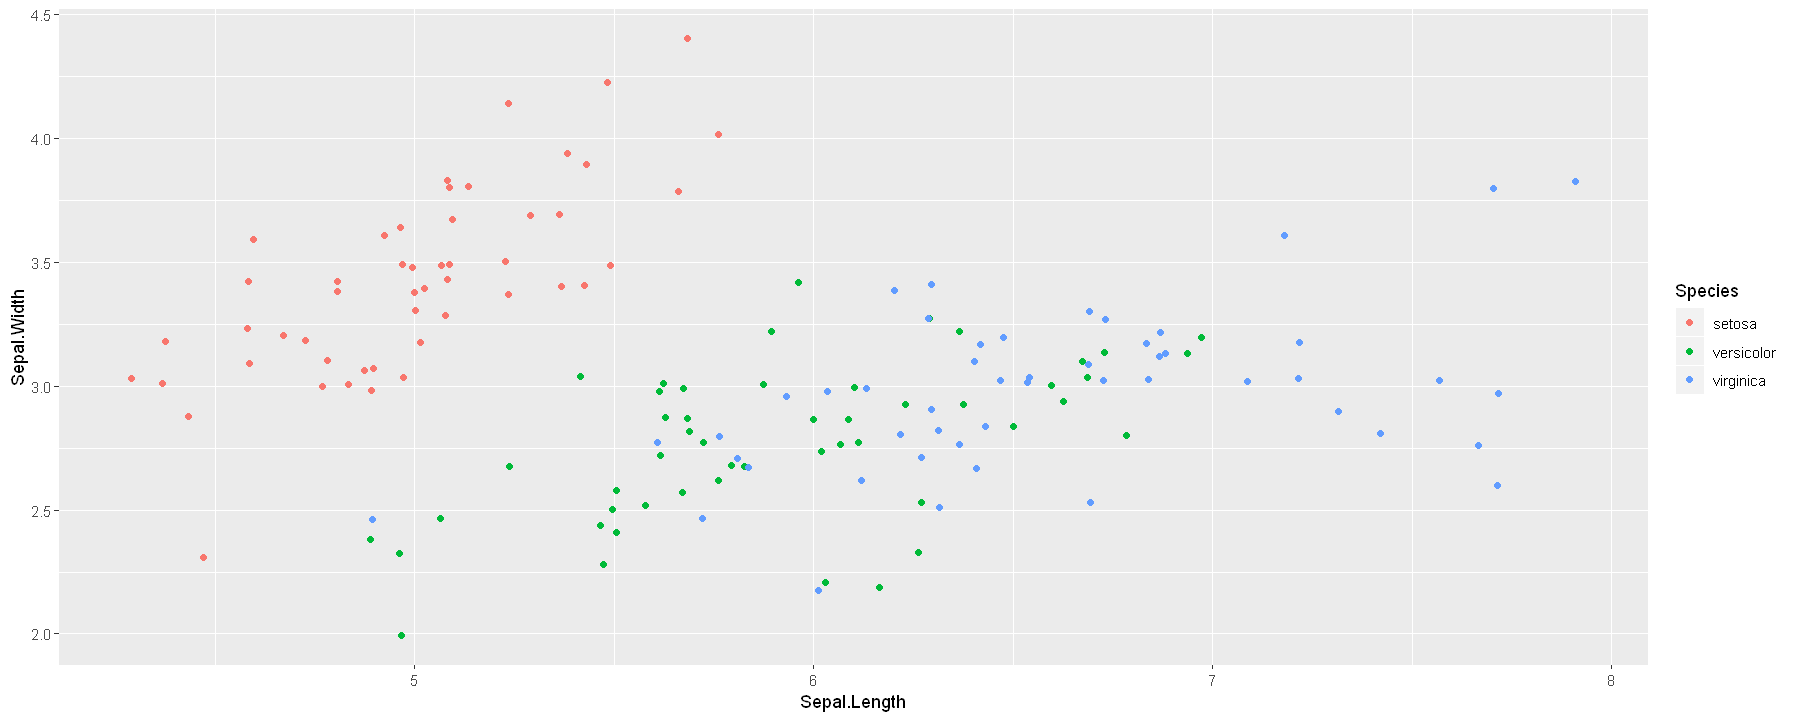

In [85]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species)) +
  # Swap for jitter layer with width 0.1
  geom_point( position='jitter')

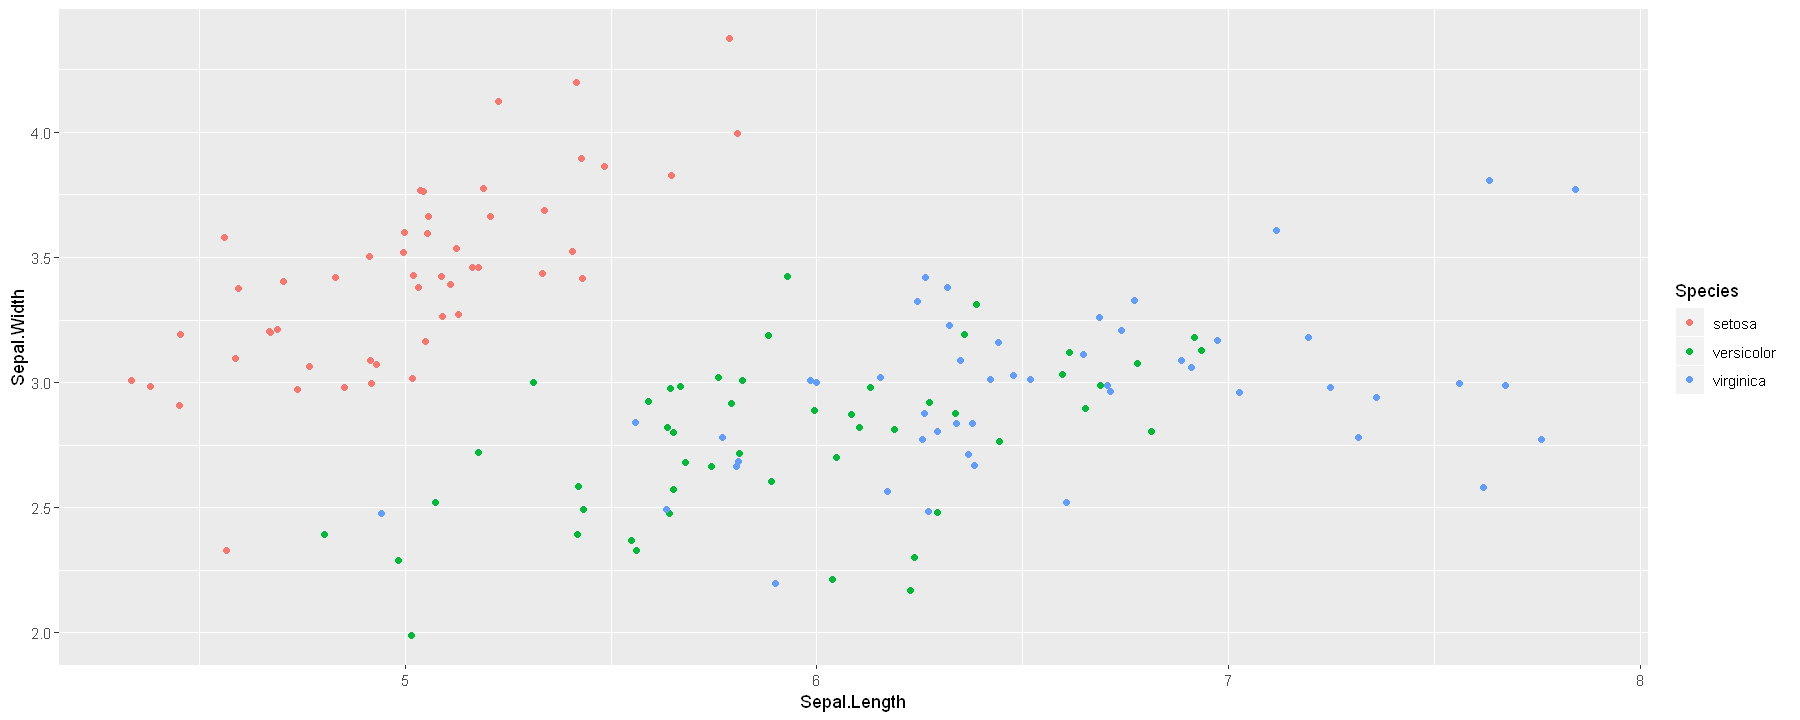

In [87]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species)) +
  # Use a jitter position function with width 0.1
  geom_point(position=position_jitter(width=0.1))

'data.frame':	30351 obs. of  4 variables:
 $ year      : num  1974 1974 1974 1974 1974 ...
 $ sex       : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 2 2 2 1 1 ...
 $ education : num  14 16 10 10 12 16 17 10 12 11 ...
 $ vocabulary: num  9 9 9 5 8 8 9 5 3 5 ...
 - attr(*, "na.action")= 'omit' Named int  1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "names")= chr  "19720001" "19720002" "19720003" "19720004" ...


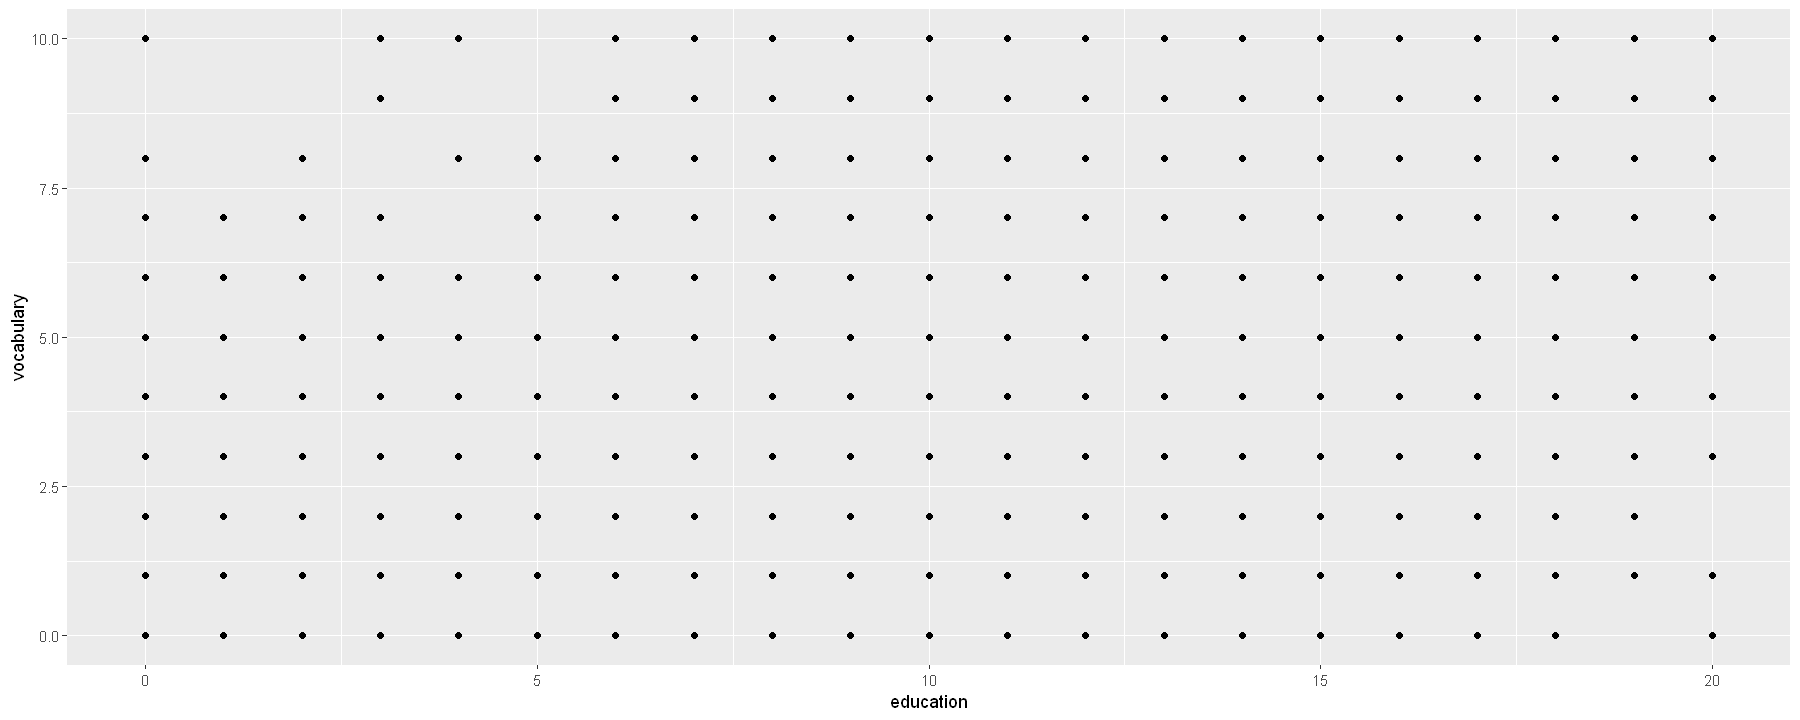

In [93]:
# Examine the structure of Vocab

str(Vocab)

# Plot vocabulary vs. education
ggplot(Vocab, aes(y=vocabulary, x=education)) +
  # Add a point layer
  geom_point()

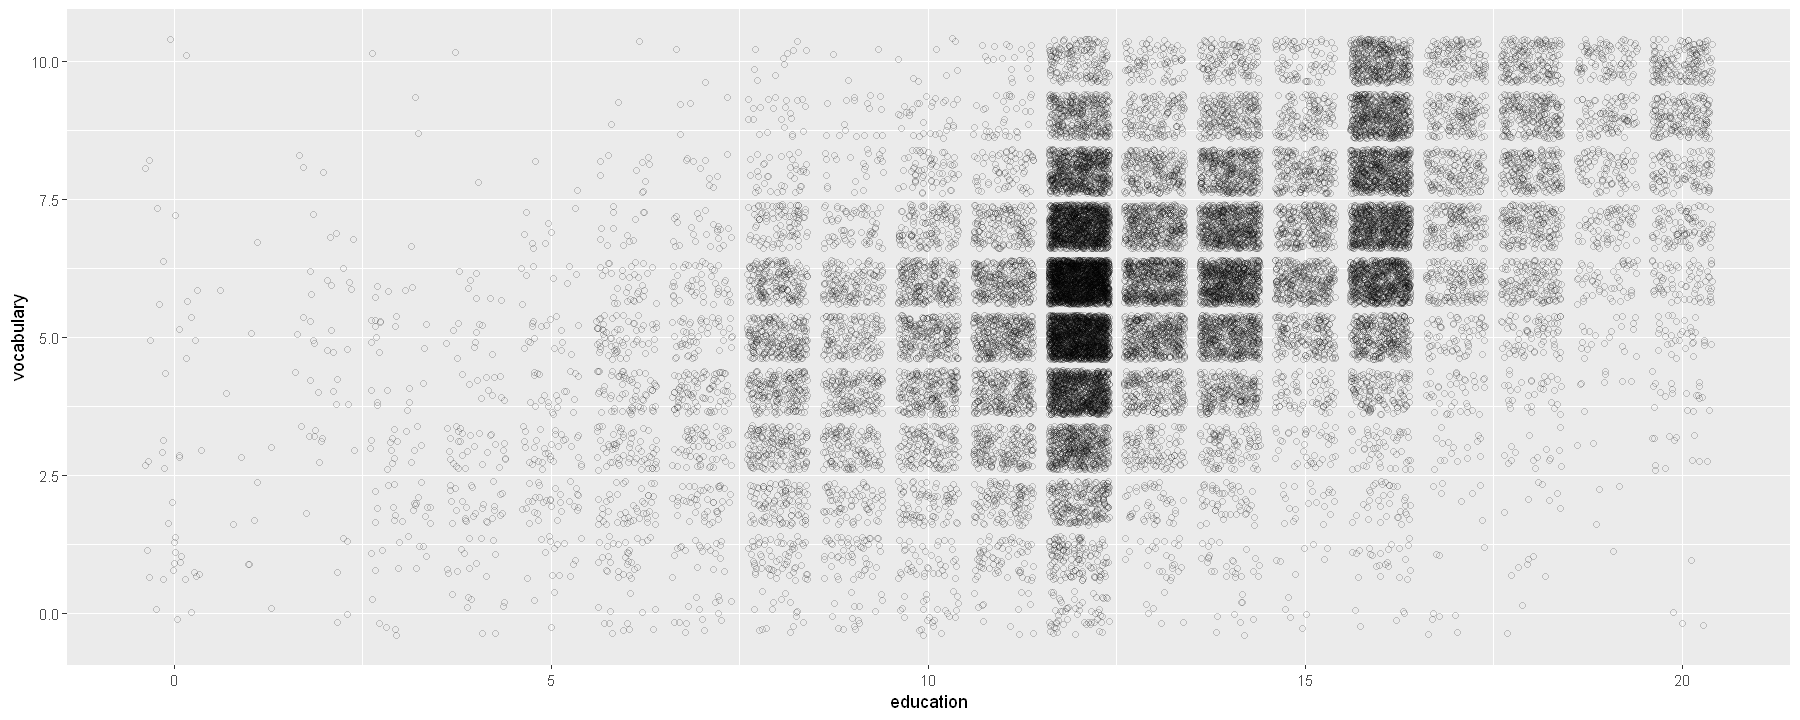

In [94]:
ggplot(Vocab, aes(education, vocabulary)) +
  # Set the shape to 1
  geom_jitter(alpha = 0.2, shape=1)

#### Historgram


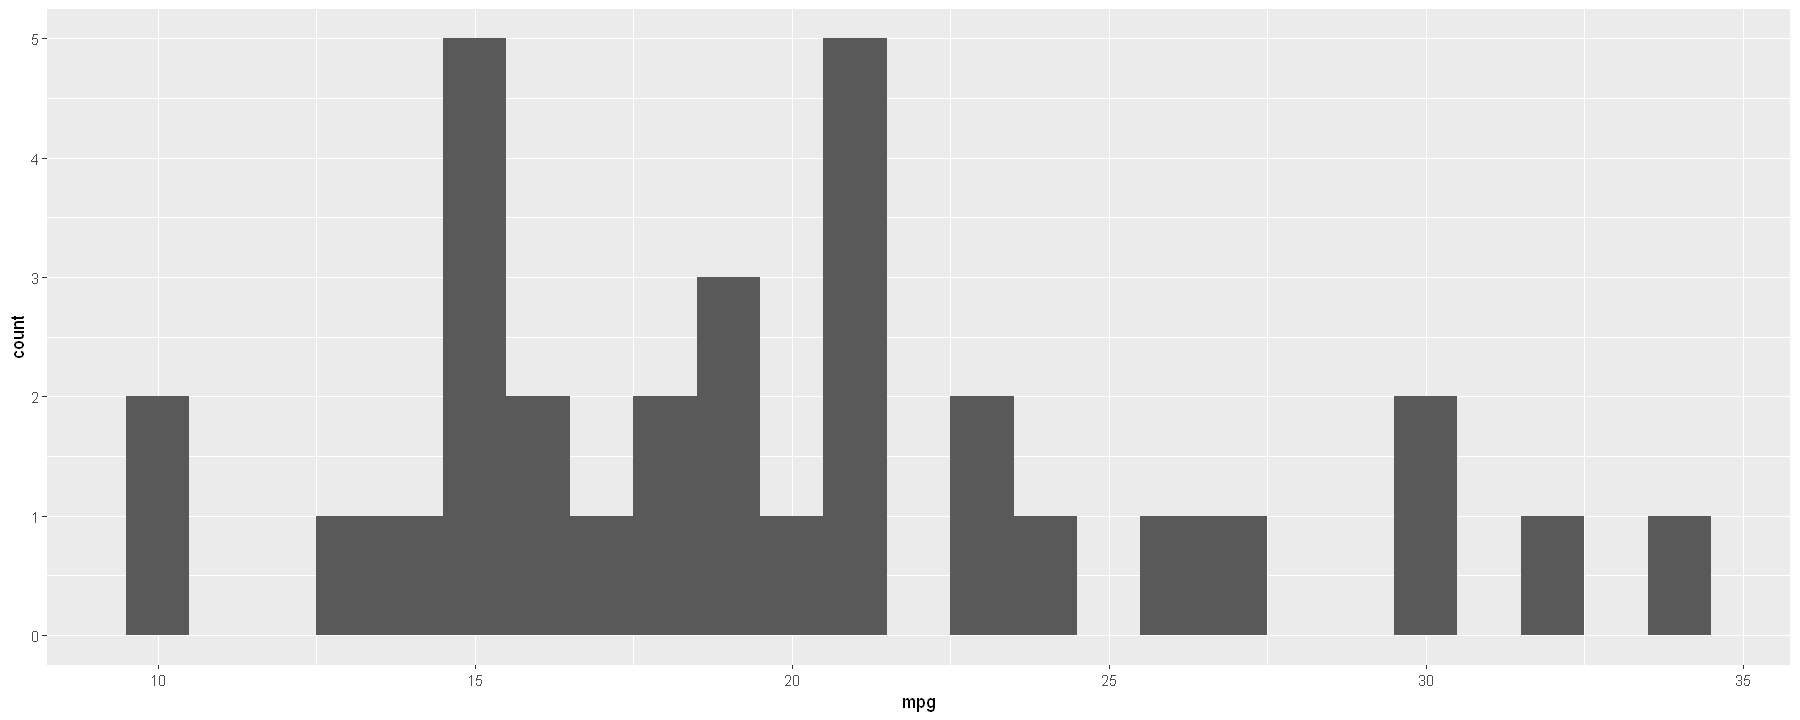

In [95]:
ggplot(mtcars, aes(mpg)) +
  geom_histogram(binwidth = 1)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


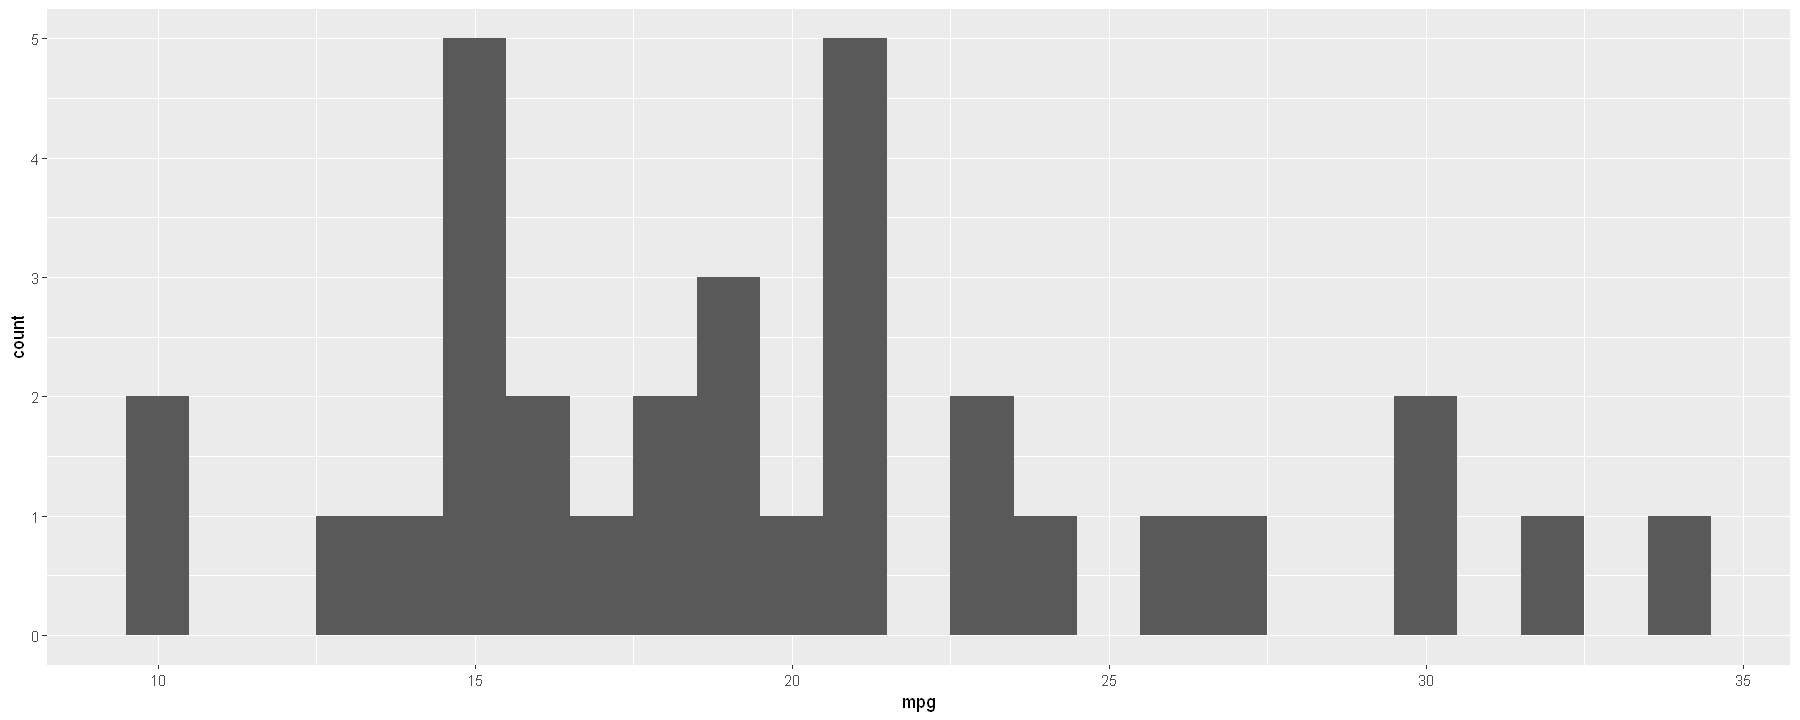

In [98]:
str(mtcars)
ggplot(mtcars, aes(mpg)) +
  geom_histogram(binwidth = 1)

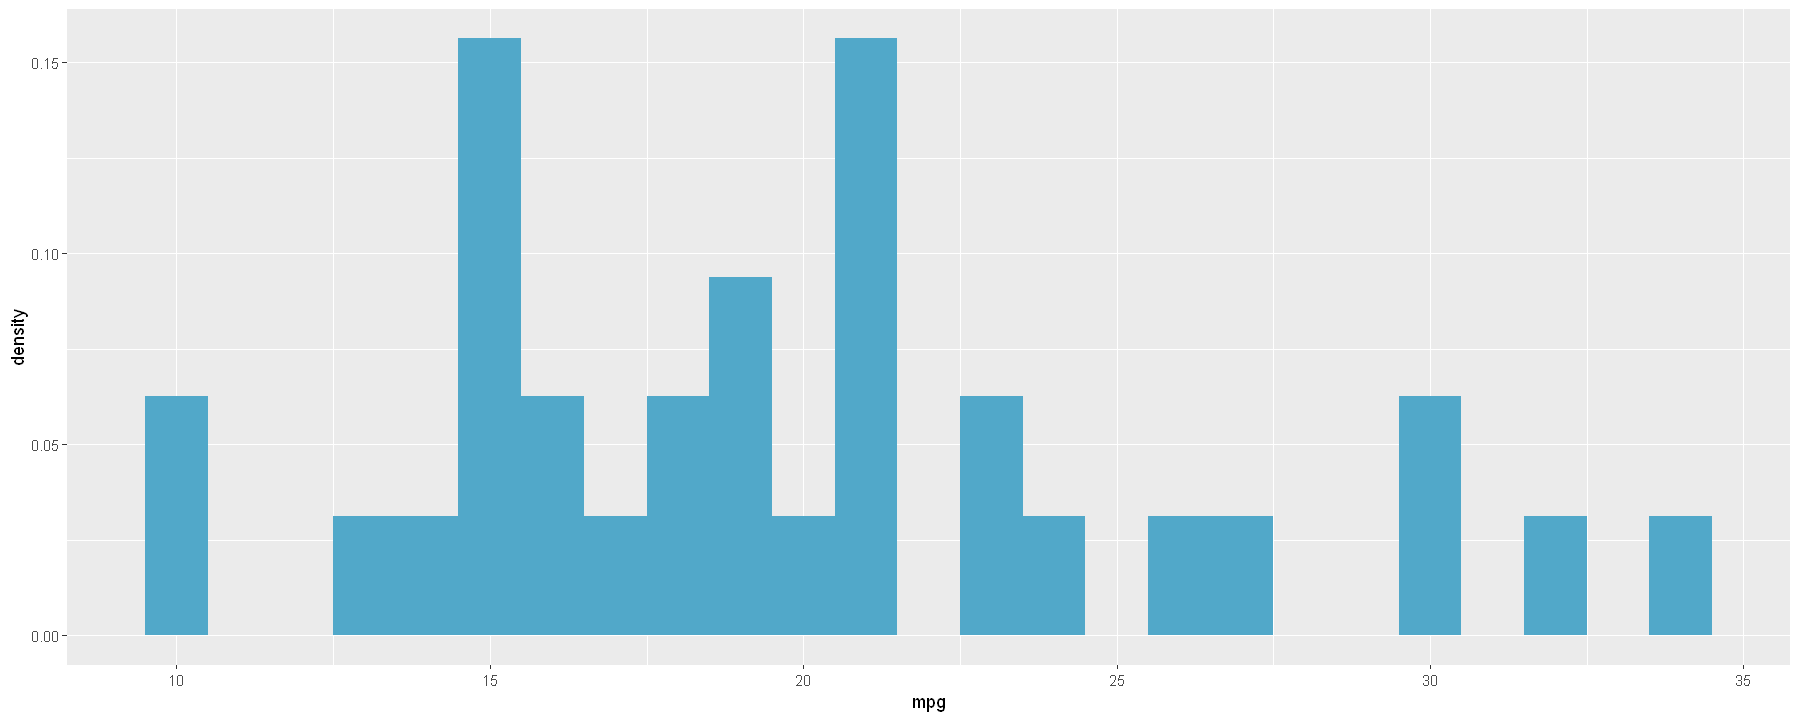

In [100]:
light_blue <- "#51A8C9"

ggplot(mtcars, aes(mpg, ..density..)) +
  # Set the fill color to datacamp_light_blue
  geom_histogram(binwidth = 1, fill=light_blue)

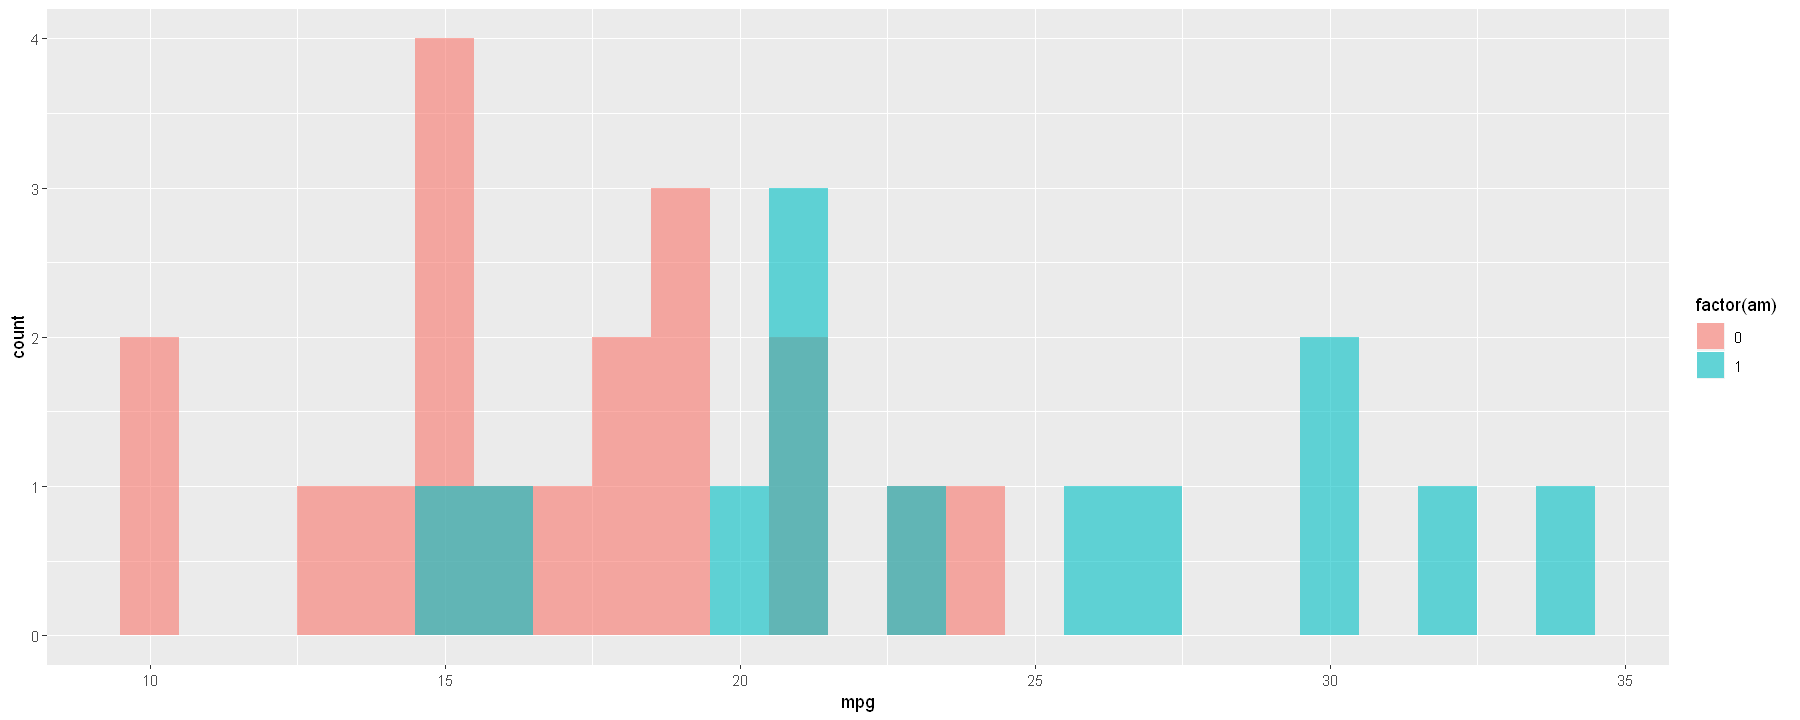

In [104]:
ggplot(mtcars, aes(mpg, fill = factor(am))) +
  # Change the position to identity, with transparency 0.6
  geom_histogram(binwidth = 1, position = "identity", alpha=0.6, )

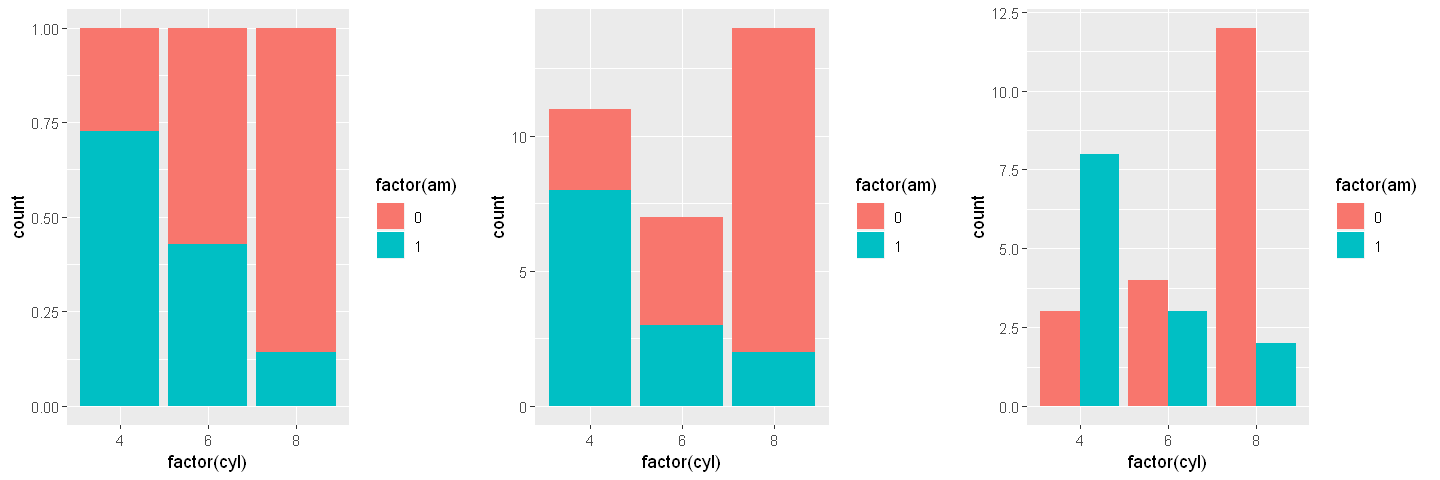

In [128]:
library(gridExtra)
options(repr.plot.width=12, repr.plot.height=4)


p1 <- ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  # Change the position to "dodge"
  geom_bar(position = "fill")

p2 <- ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  # Change the position to "dodge"
  geom_bar()

p3 <-ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  # Change the position to "dodge"
  geom_bar(position = "dodge")

grid.arrange(p1, p2, p3, ncol=3)

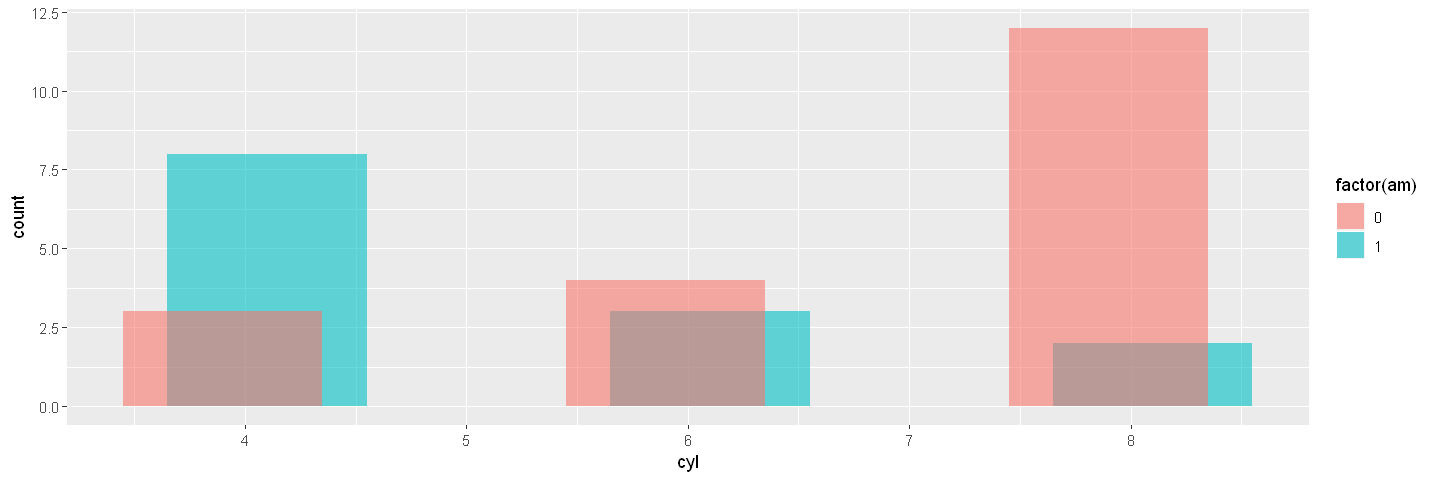

In [135]:
options(repr.plot.width=12, repr.plot.height=4)
ggplot(mtcars, aes(cyl, fill = factor(am))) +
  # Set the transparency to 0.6
  geom_bar(position = position_dodge(width = 0.4), alpha=0.6)

'data.frame':	30351 obs. of  4 variables:
 $ year      : num  1974 1974 1974 1974 1974 ...
 $ sex       : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 2 2 2 1 1 ...
 $ education : num  14 16 10 10 12 16 17 10 12 11 ...
 $ vocabulary: num  9 9 9 5 8 8 9 5 3 5 ...
 - attr(*, "na.action")= 'omit' Named int  1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "names")= chr  "19720001" "19720002" "19720003" "19720004" ...


Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Blues is 9
Returning the palette you asked for with that many colors
"


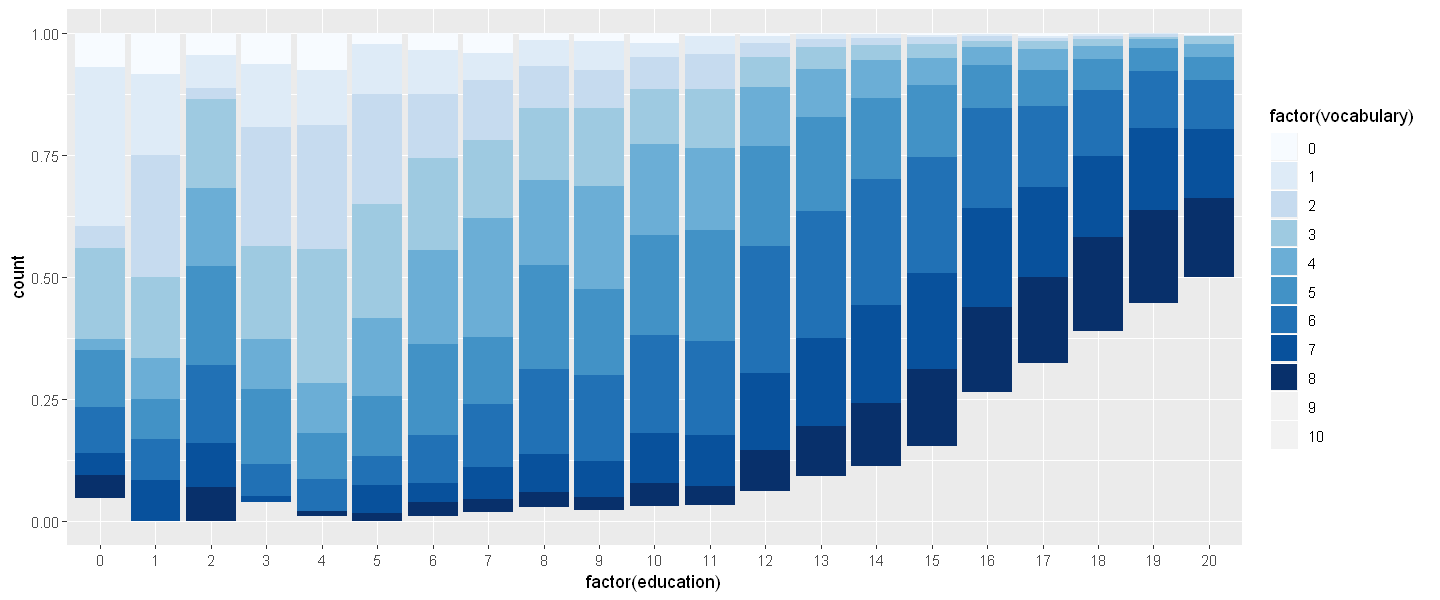

In [147]:
str(Vocab)

options(repr.plot.width=12, repr.plot.height=5)

ggplot(Vocab, aes(x = factor(education), fill = factor(vocabulary))) + 
  geom_bar(position = "fill") + 
  scale_fill_brewer(palette = "Blues")

#### Lineplot

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


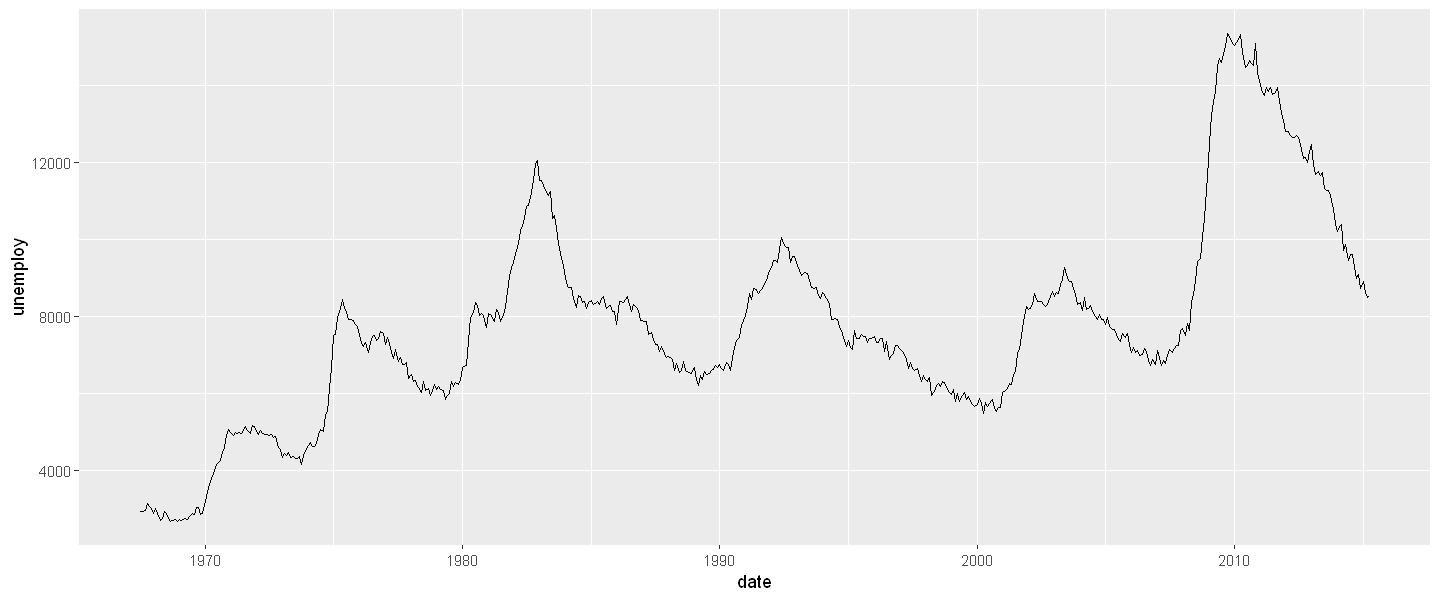

In [148]:
# Print the head of economics
head(economics)

# Using economics, plot unemploy vs. date
ggplot(economics, aes(x=date, y=unemploy)) +
  # Make it a line plot
  geom_line()

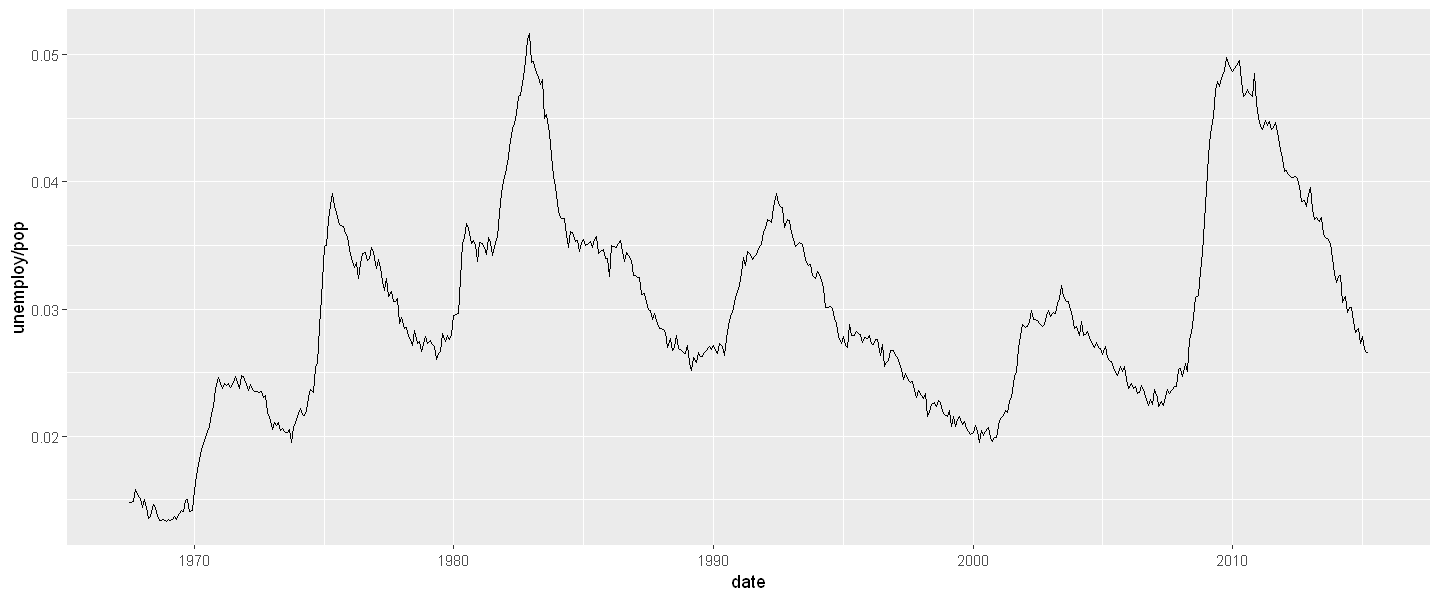

In [149]:
# Change the y-axis to the proportion of the population that is unemployed
ggplot(economics, aes( date,unemploy/pop)) +
  geom_line()

In [158]:
load("fish.RData")
str(fish.species)

'data.frame':	61 obs. of  8 variables:
 $ Year    : int  1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 ...
 $ Pink    : int  100600 259000 132600 235900 123400 244400 203400 270119 200798 200085 ...
 $ Chum    : int  139300 155900 113800 99800 148700 143700 158480 125377 132407 113114 ...
 $ Sockeye : int  64100 51200 58200 66100 83800 72000 84800 69676 100520 62472 ...
 $ Coho    : int  30500 40900 33600 32400 38300 45100 40000 39900 39200 32865 ...
 $ Rainbow : int  0 100 100 100 100 100 100 100 100 100 ...
 $ Chinook : int  23200 25500 24900 25300 24500 27700 25300 21200 20900 20335 ...
 $ Atlantic: int  10800 9701 9800 8800 9600 7800 8100 9000 8801 8700 ...


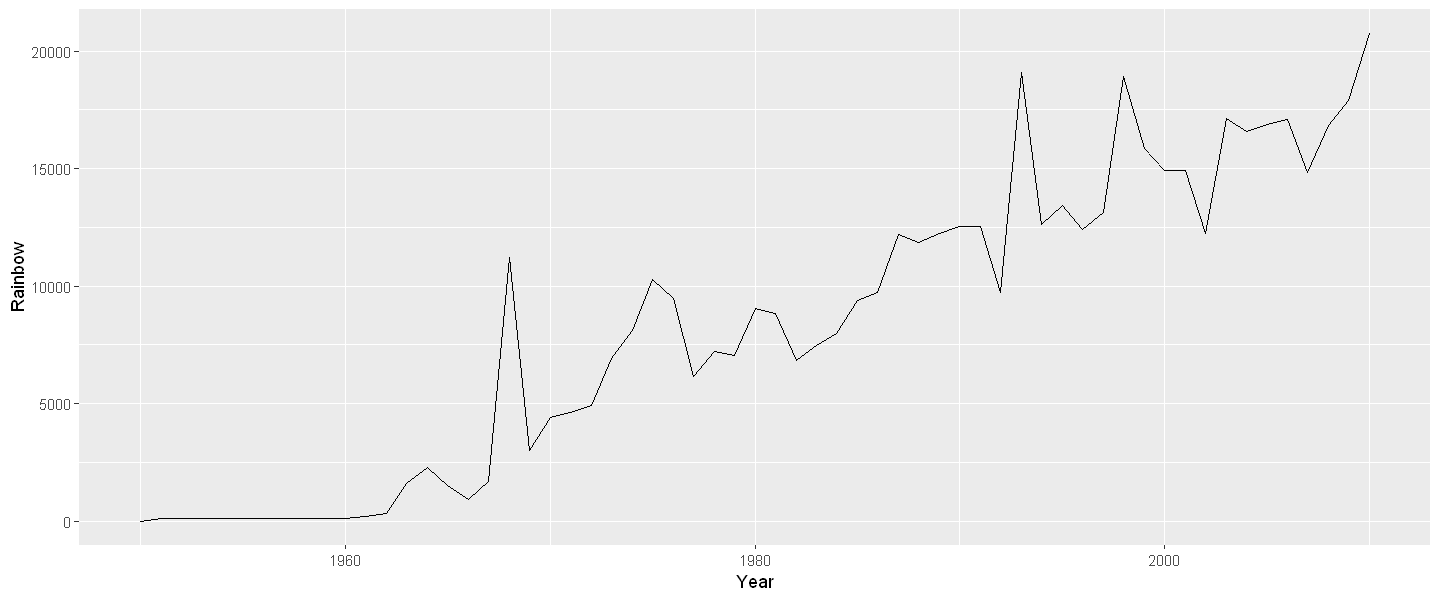

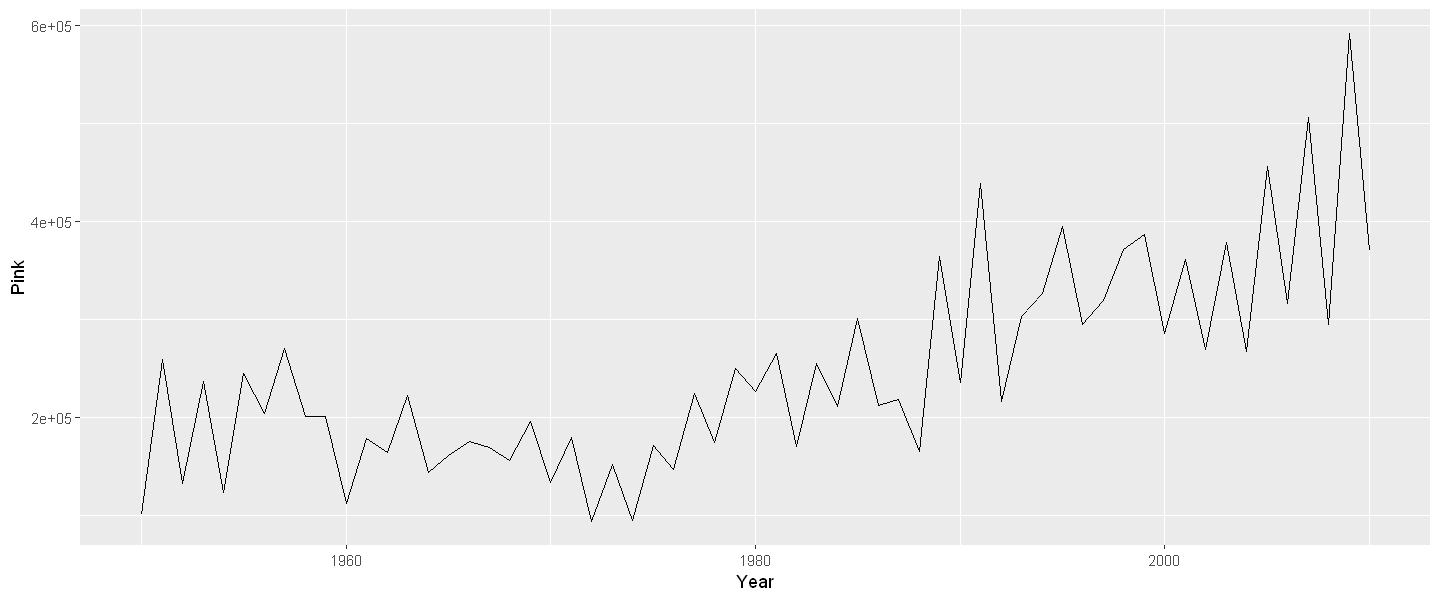

In [159]:
# Plot the Rainbow Salmon time series
ggplot(fish.species, aes(x = Year, y = Rainbow)) +
  geom_line()

# Plot the Pink Salmon time series
ggplot(fish.species, aes(x = Year, y = Pink)) +
  geom_line()



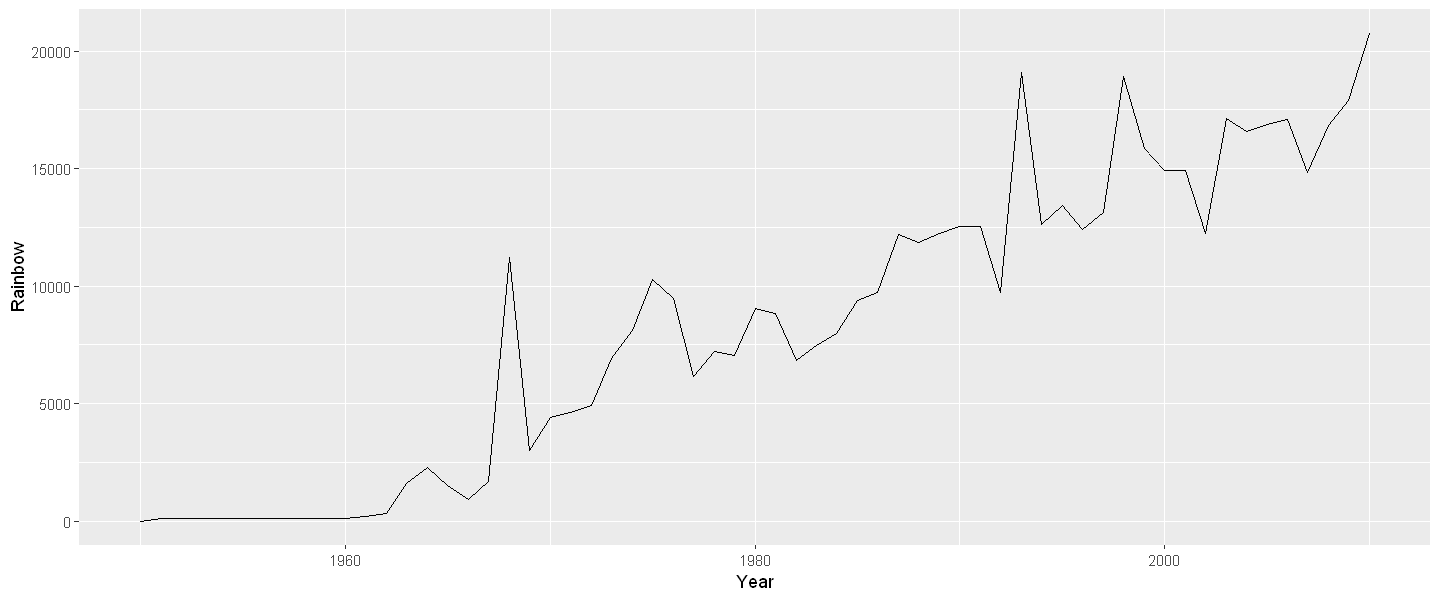

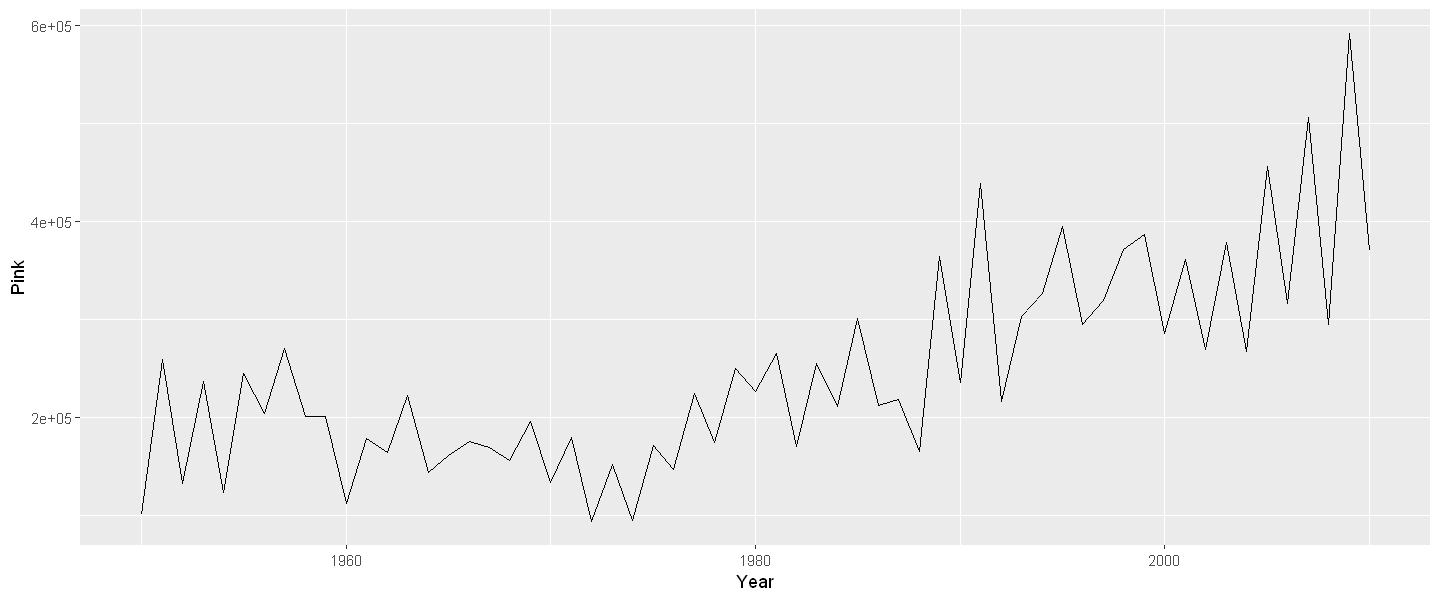

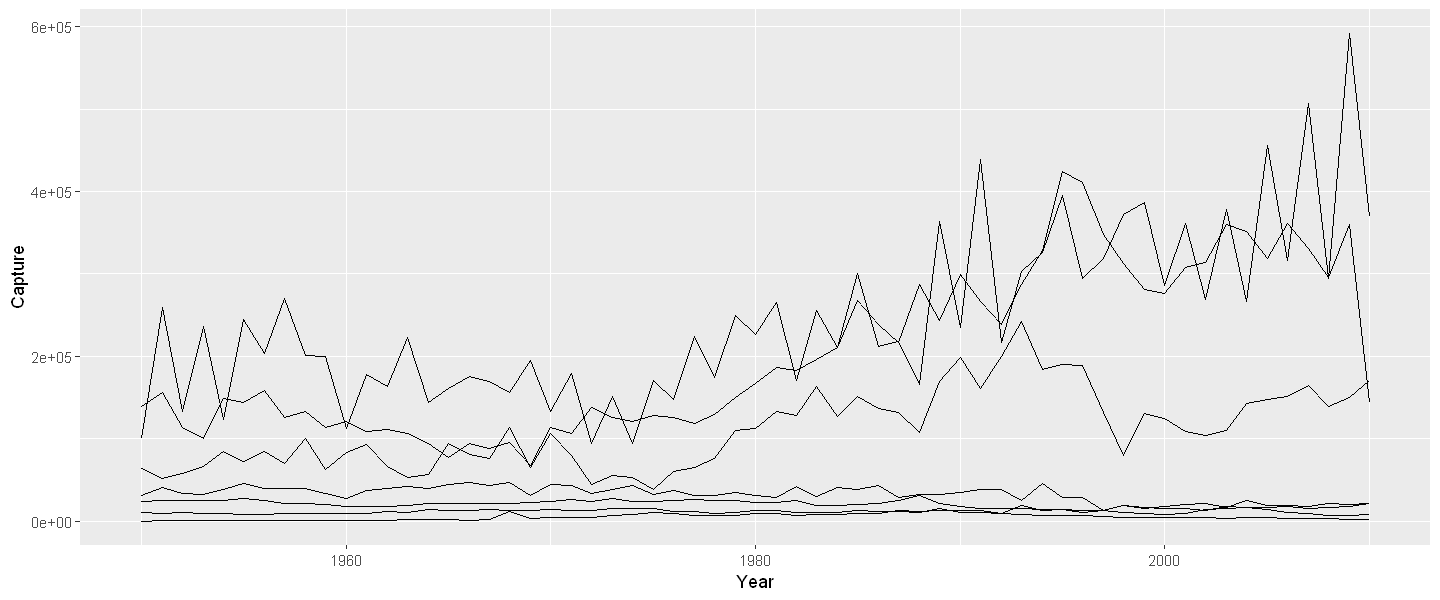

In [160]:
# Plot the Rainbow Salmon time series
ggplot(fish.species, aes(x = Year, y = Rainbow)) +
  geom_line()

# Plot the Pink Salmon time series
ggplot(fish.species, aes(x = Year, y = Pink)) +
  geom_line()

# Plot multiple time-series by grouping by species
ggplot(fish.tidy, aes(Year, Capture)) +
  geom_line(aes(group = Species))

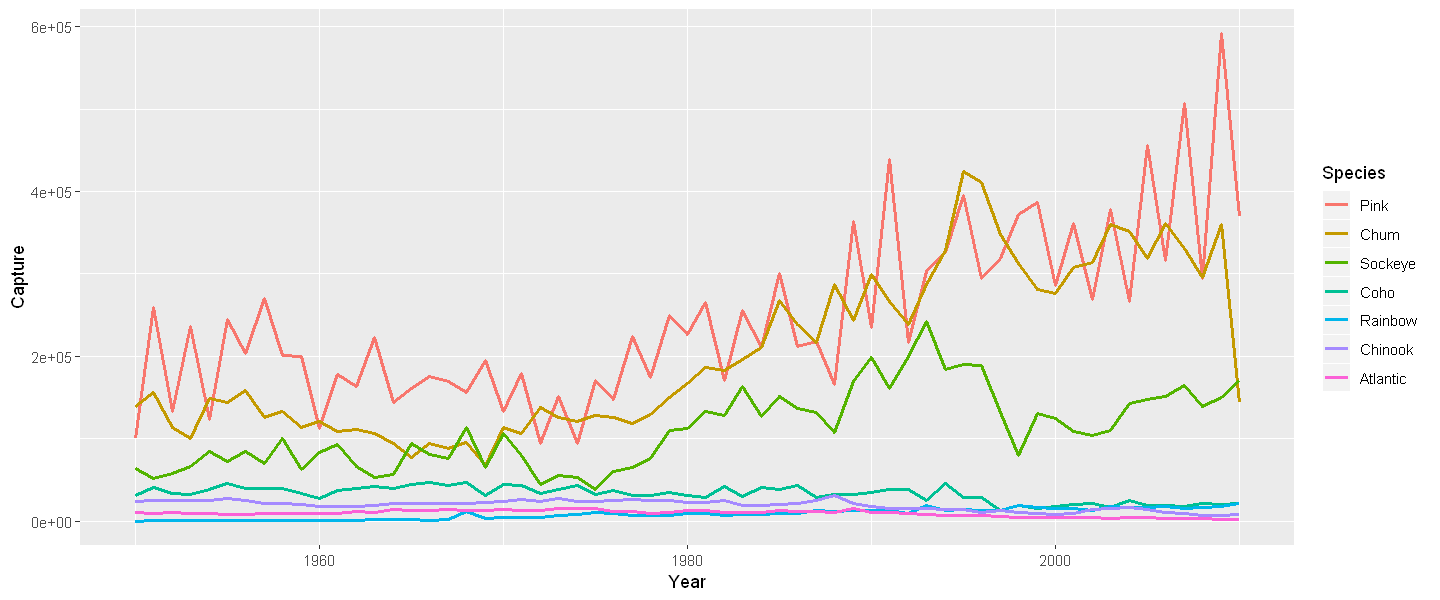

In [167]:
# Plot multiple time-series by coloring by species
ggplot(fish.tidy, aes(x = Year, y = Capture, color = Species )) +
  geom_line(aes(group = Species), size=1)

### 4. Themes
Dening theme objects
- Useful when you have many plots
- Provides consistency in style
- Apply a specic theme everywhere


In [175]:
head(recess)

,begin,end
,<date>,<date>
1,1969-12-01,1970-11-01
2,1973-11-01,1975-03-01
3,1980-01-01,1980-07-01
4,1981-07-01,1982-11-01
5,1990-07-01,1991-03-01
6,2001-03-01,2001-11-01


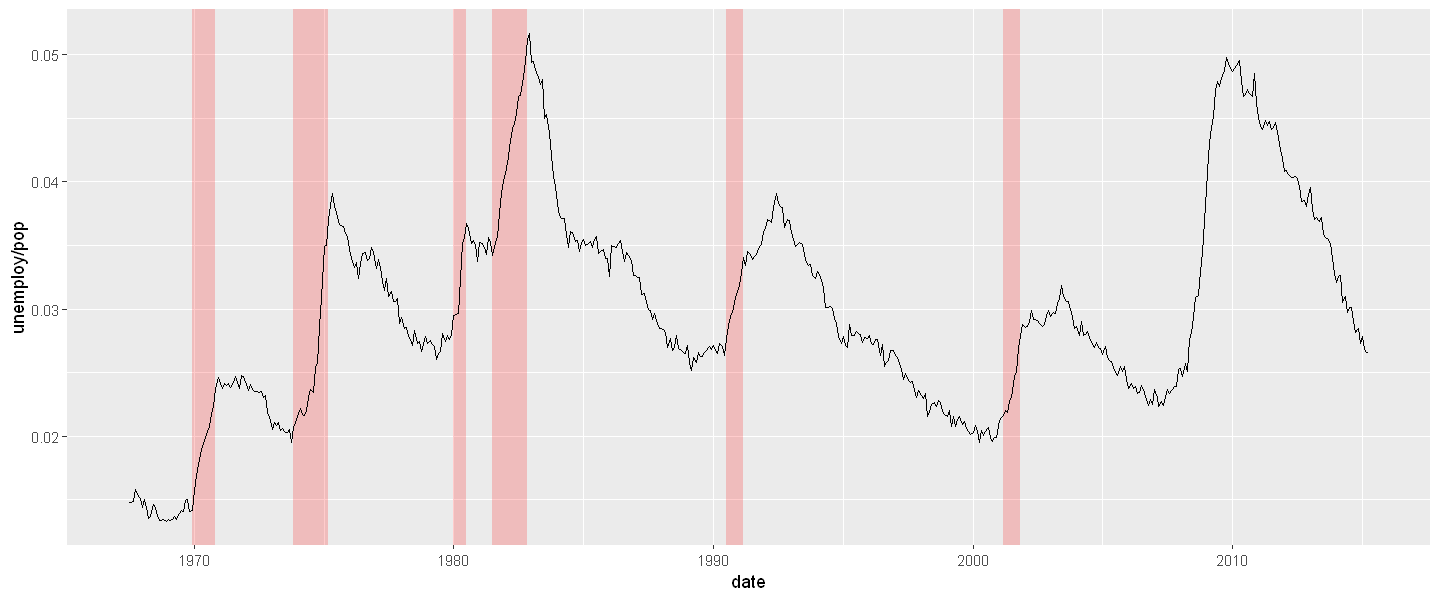

In [174]:
load("recess.RData")
names(recess) <- c("begin","end")
recess$begin <- as.Date(recess$begin, format = c("%d/%m/%Y"))
recess$end <- as.Date(recess$end, format = c("%d/%m/%Y"))

# Expand the following command with geom_rect() to draw the recess periods
ggplot(economics, aes(x = date, y = unemploy/pop)) +
  geom_rect(data = recess,
            aes(xmin = begin, xmax = end, ymin = -Inf, ymax = +Inf),
            inherit.aes = FALSE, fill = "red", alpha = 0.2) +
  geom_line()

### 5. Statistics

### 6. Coordinates


### 7. Facets

### 8. Best Practices
